<a href="https://colab.research.google.com/github/yaolihua081/Automatic-Essay-Scoring/blob/main/AutomaticScoringFeaturetractionMay2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Package

In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [5]:

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: nvidia-smi: command not found


## **Import Package**

In [ ]:
!pip install -U pip setuptools wheel

!pip install -U spacy

!python -m spacy download en_core_web_sm

In [ ]:
import gensim,spacy
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import models, corpora
from nltk.corpus import stopwords 
#!pip install nltk

# NLTK Stop words
import nltk
#nltk.download('all')

from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stemmer = SnowballStemmer("english")
porter=PorterStemmer()
nltk.download('wordnet')
STOPWORDS = stopwords.words('english')
#STOPWORDS.extend(['passage','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
STOPWORDS.extend(['@', 're', 'not', '_', "0","1","2","3","4","5","6","7","8","9"])

tmp = nltk.download(['stopwords', 'gutenberg','punkt'], quiet=True) # See https://www.nltk.org/book/ch02.html
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, HashingVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Flatten
#from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D, MaxPooling1D
from numpy import loadtxt
from keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
#!pip install pyspellchecker
# import all necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Import scikit-learn metrics module for accuracy calculation

# For dataframes
import pandas as pd 

# For numerical arrays
import numpy as np 

import re, numpy as np, pandas as pd
np.random.seed(400)
import matplotlib.pyplot as plt

# For stemming/Lemmatisation/POS tagging
import spacy

# For getting stopwords
from spacy.lang.en.stop_words import STOP_WORDS

# For K-Fold cross validation
from sklearn.model_selection import KFold

# For visualizations
import matplotlib.pyplot as plt

# For regular expressions
import re

# For handling string
import string

# For all torch-supported actions
import torch

# For spell-check
#from spellchecker import SpellChecker

# For performing mathematical operations
import math

# For dictionary related activites
from collections import defaultdict

# For counting actions (EDA)
from collections import  Counter

# For count vectorisation (EDA)
from sklearn.feature_extraction.text import CountVectorizer

# For one-hot encoding
from tensorflow.keras.utils import to_categorical

# For DL model
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from tensorflow.keras.models import Model, Sequential

# For generating random integers
from random import randint

# For TF-IDF vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer

# For padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# For tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

# For plotting
import seaborn as sns

print("Necessary libraries imported")

# Constant variables 

# spaCy language lemmatiser model
sp=spacy.load('en_core_web_sm')
#spell = SpellChecker()

print("Constant variables ready")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Necessary libraries imported
Constant variables ready


In [3]:
import sklearn
def sklearn_qwk(y_true, y_pred) -> np.float64:
    """
    Function for measuring Quadratic Weighted Kappa with scikit-learn
    
    :param y_true: The ground truth labels
    :param y_pred: The predicted labels
    
    :return The Quadratic Weighted Kappa Score (QWK)
    """
    return sklearn.metrics.cohen_kappa_score(y_true, y_pred, weights="quadratic")

## Read Data

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##**Read in data and do some checking**

In [12]:
filein="/content/gdrive/My Drive/AutomaticScoring/"+"training_set_rel3.tsv"
train_all = pd.read_csv(filein,sep="\t",header=0,encoding='ISO-8859-1')
train_all=train_all.drop_duplicates(ignore_index=True)

filein="/content/gdrive/My Drive/AutomaticScoring/"+"valid_set.tsv"
validation= pd.read_csv(filein,sep="\t",header=0,encoding='ISO-8859-1')
filein="/content/gdrive/My Drive/AutomaticScoring/"+"valid_sample_submission_5_column.csv"
valid_predict=pd.read_csv(filein)
df1=validation
df2=valid_predict
validation_all=df1.merge(df2, left_on='domain1_predictionid', right_on='prediction_id')
validation_all['domain1_score']=validation_all['predicted_score']
validation_all['essay_set']=validation_all['essay_set_x']
validation_all['essay_id']=validation_all['essay_id_x']
filein="/content/gdrive/My Drive/AutomaticScoring/"+"test_set.tsv"

test_all = pd.read_csv(filein,sep="\t",header=0,encoding='ISO-8859-1')

### Compute FREQ

In [ ]:

prompts=6
def countfreq(df,type):
  for i in range(0,prompts):
    prompt=i+1
    pt1_dat=df[df.essay_set==prompt]
    y=pt1_dat['domain1_score']
    class_counts = pd.Series(y).value_counts()
    
    #class_counts=pt1_dat['domain1_score'].count()
    column_percent = round((class_counts / len(pt1_dat)) * 100)
    temp2 = pd.DataFrame(column_percent)
    temp2.columns=["Percent"]
    temp1 = pd.DataFrame(class_counts)
    temp1.columns=["COUNT"]
    #df1= pd.concat([pd.DataFrame(class_counts),pd.DataFrame(column_percent)],axis=1)
    df1= pd.concat([temp1,temp2],axis=1)
    df1 = df1.reset_index()
    df1 = df1.rename(columns={"index": "Score"})
    df1 = df1.reset_index(drop=True)
    df1.sort_values('Score', ascending=True, inplace=True)
    fileout="/content/gdrive/My Drive/AutomaticScoring/"+type+ "Prompt"+str(prompt)+"FREQ.csv"
    pd.DataFrame(df1).to_csv(fileout)


df=train_all.copy()
countfreq(df,"train")   
df=validation_all.copy()
countfreq(df,"validation") 

### Check data

In [ ]:
pd.set_option('display.max_rows', None)
df=train_all
print('\nNull Statistics (in %): ')
print(df.isnull().sum()* 100 / len(df))

In [ ]:
print('\nEssay prompt frequency: ')
print(df.essay_set.value_counts())

In [16]:
set(df['essay_set'])

{1, 2, 3, 4, 5, 6, 7, 8}

## Plot

Graph for score vs average word length


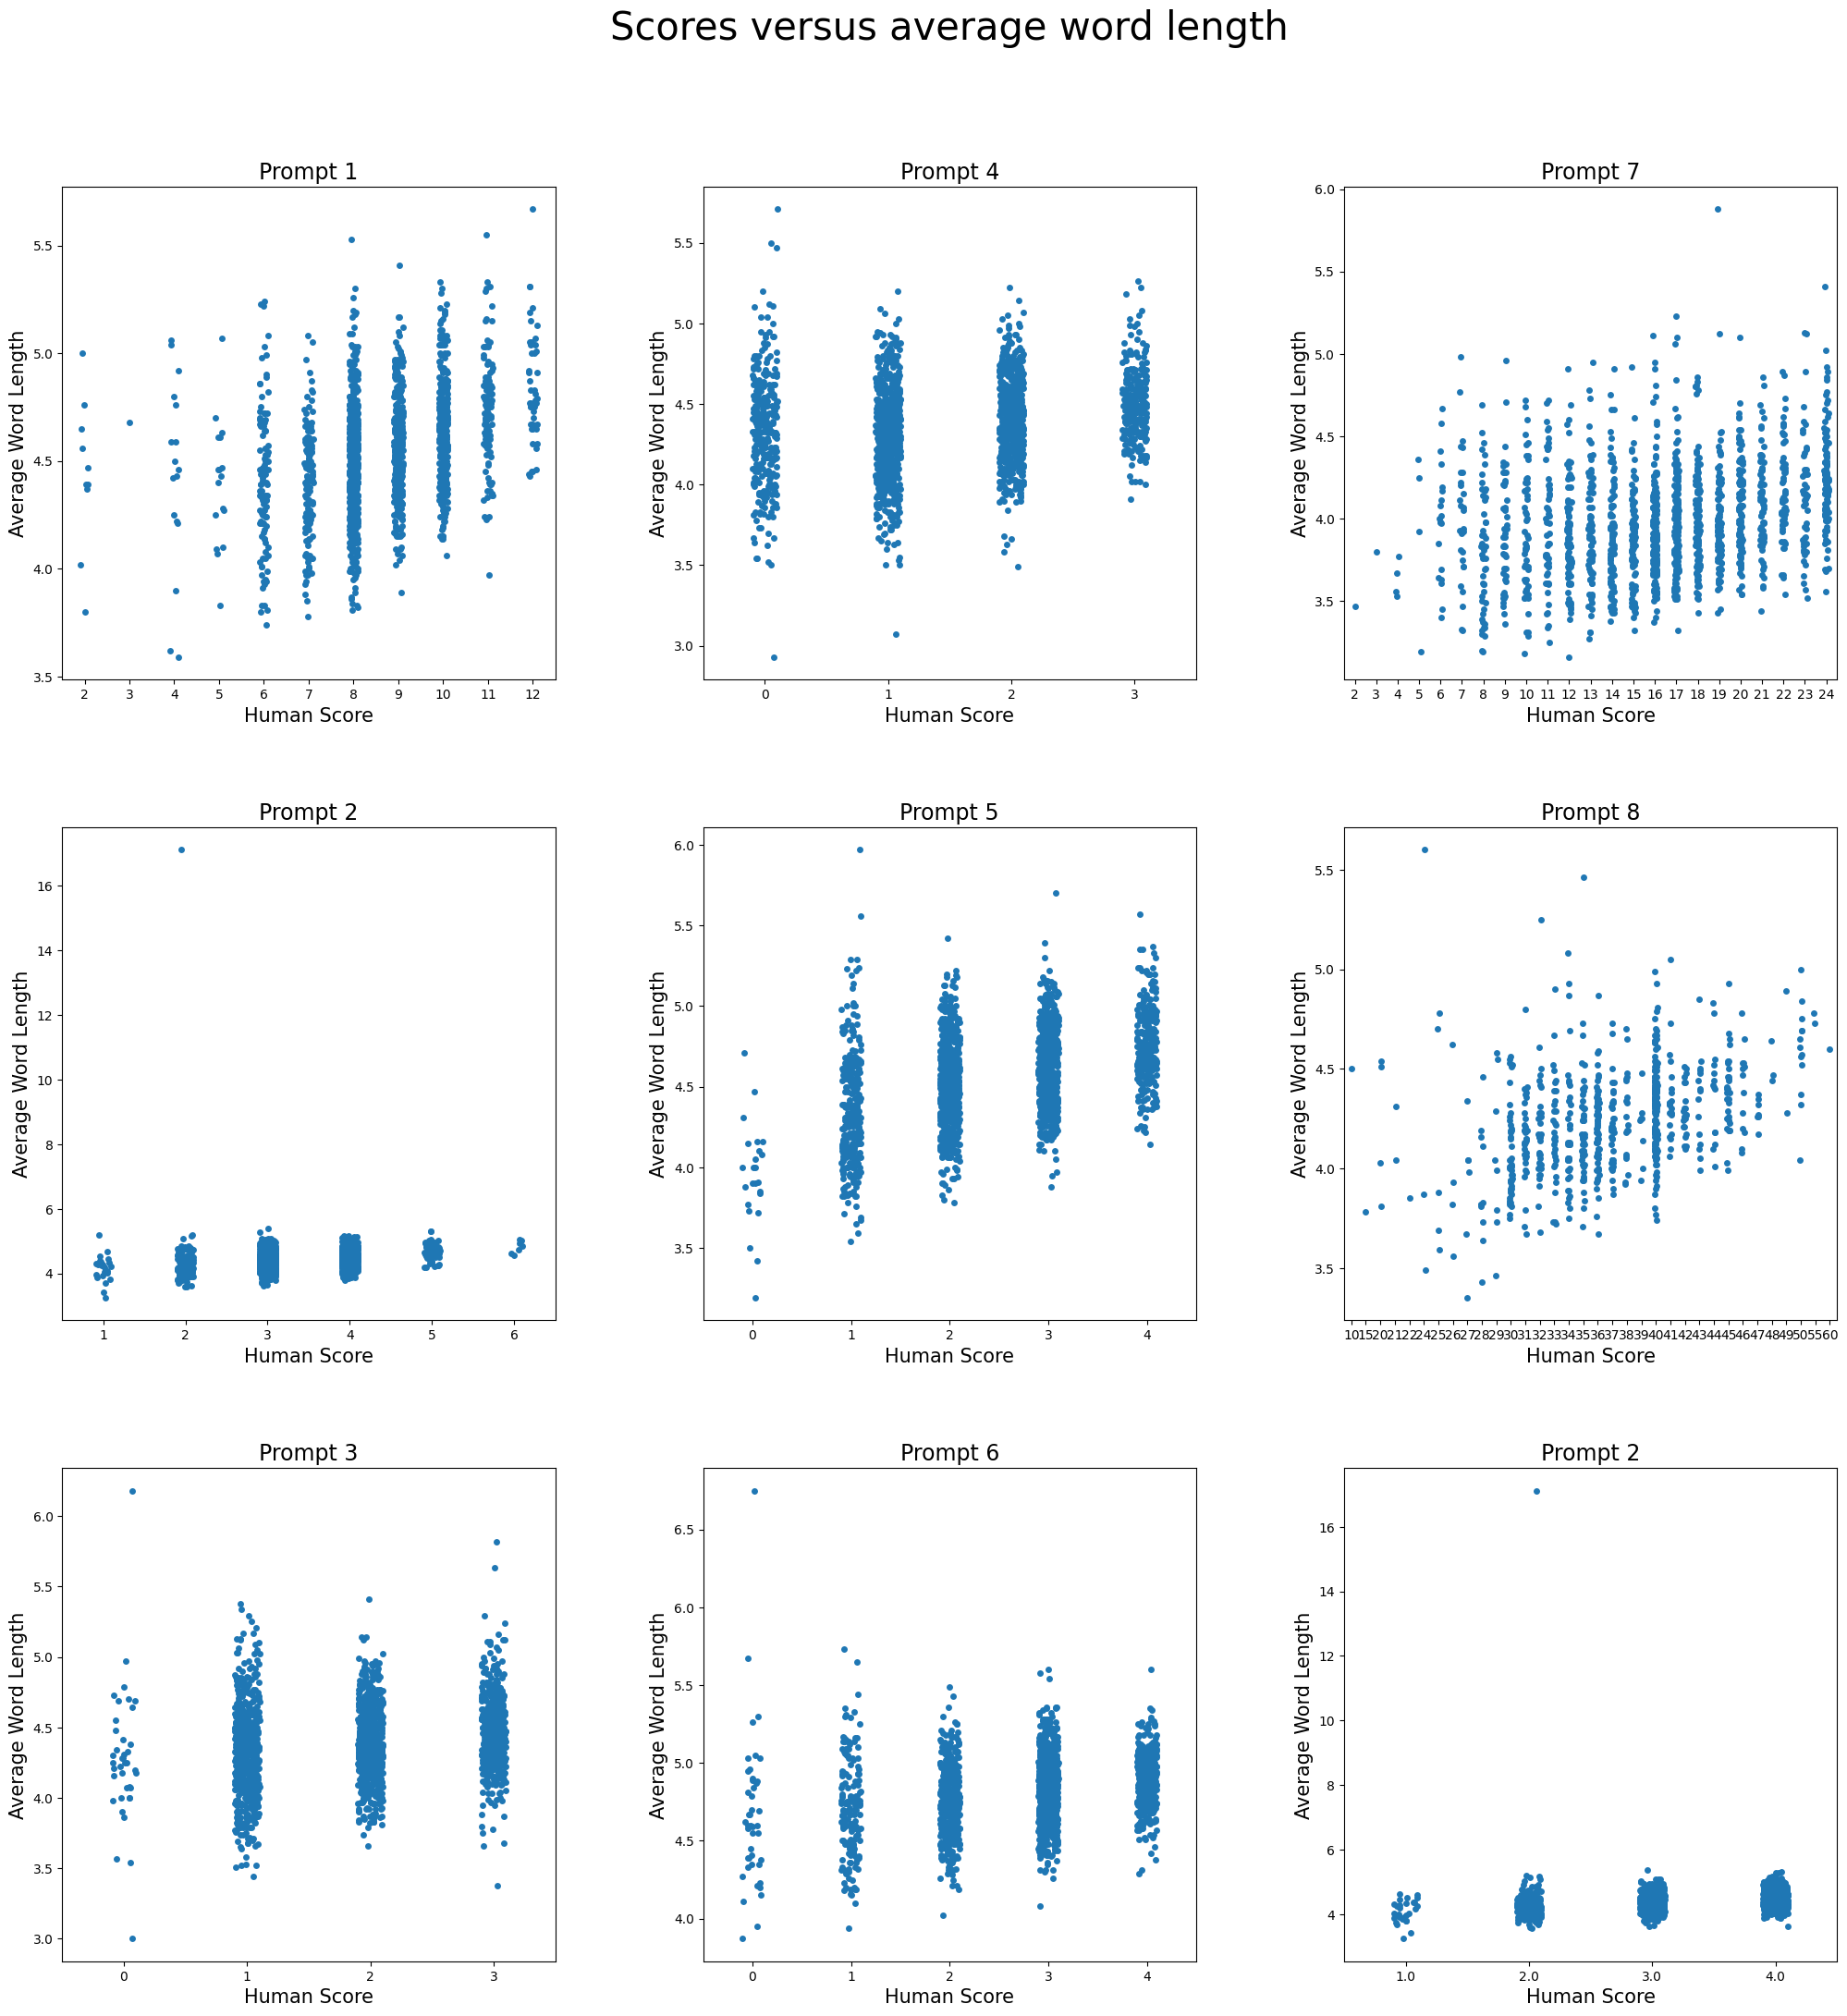

In [17]:
def get_avg_length(essay):
    summ=0
    for word in essay.split():
        summ+=len(word)
    return round(summ/len(essay.split()),2)

df['avg_word_length']=df.essay.apply(lambda x: get_avg_length(x))
print("Graph for score vs average word length")

fig, axes = plt.subplots(3, 3, figsize=(24,24)) # creating a figure with 3 rows and 3 columns of plots
fig.suptitle('Scores versus average word length',fontsize=30)

for prompt in range(0,8):
  curdf=df[df['essay_set']==prompt+1]  
  g=sns.stripplot(ax=axes[prompt%3,math.floor(prompt/3)],
    data=curdf,
    x="domain1_score", y="avg_word_length")
    #x="Rater Score", y="Avarage Word length")
  g.set_xlabel("Human Score",fontsize=15)
  g.set_ylabel("Average Word Length",fontsize=15)
  axes[prompt%3,math.floor(prompt/3)].set_title("Prompt "+str(prompt+1),fontsize=17)

prompt=1
curdf=df[df['essay_set']==prompt+1]  
g=sns.stripplot(ax=axes[2,2],
    data=curdf,
    x="domain2_score", y="avg_word_length")
g.set_xlabel("Human Score",fontsize=15)
g.set_ylabel("Average Word Length",fontsize=15)
axes[2,2].set_title("Prompt "+str(prompt+1),fontsize=17)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

fig.savefig("average word length.jpg")
fig.show()


Graph for score vs total words


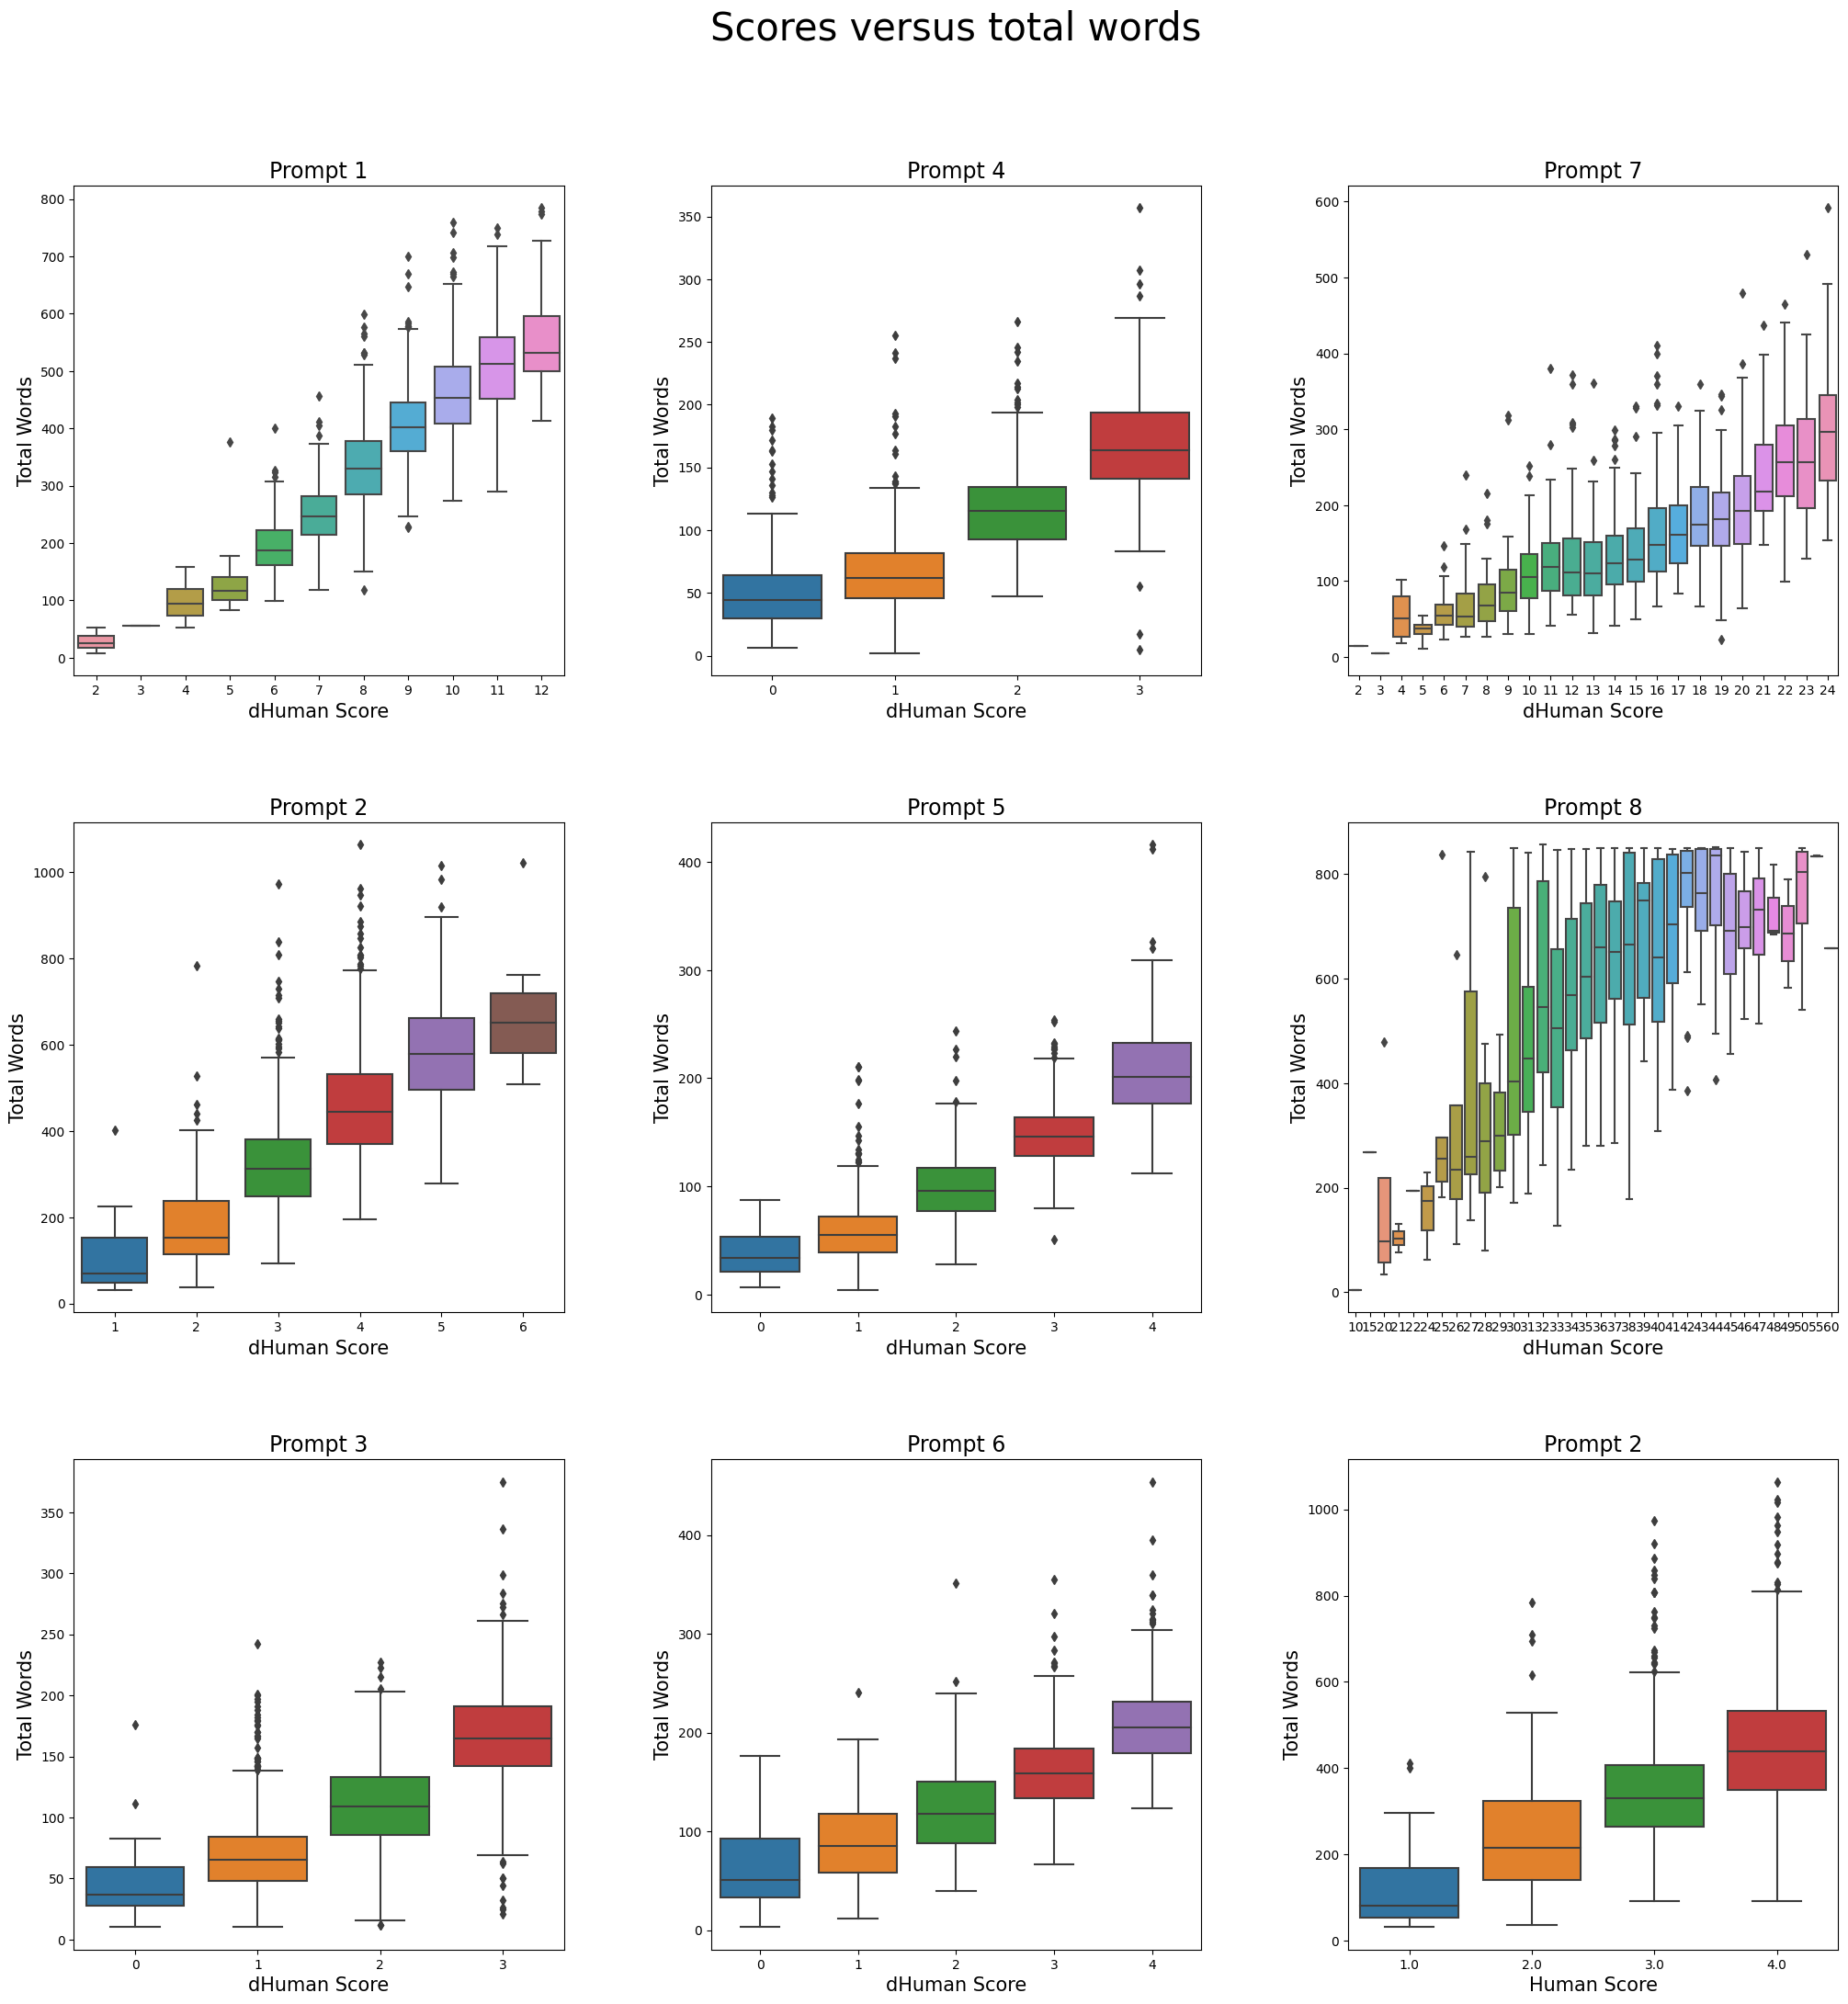

In [18]:
print("Graph for score vs total words")


df['total_words']=df.essay.apply(lambda x: len(x.split()))
fig, axes = plt.subplots(3, 3, figsize=(24,24)) # creating a figure with 3 rows and 3 columns of plots
fig.suptitle('Scores versus total words',fontsize=30)

for prompt in range(0,8):
  curdf=df[df['essay_set']==prompt+1]  
  g=sns.boxplot(ax=axes[prompt%3,math.floor(prompt/3)],
    data=curdf,
    x="domain1_score", y="total_words")
  g.set_xlabel("dHuman Score",fontsize=15)
  g.set_ylabel("Total Words",fontsize=15)
  axes[prompt%3,math.floor(prompt/3)].set_title("Prompt "+str(prompt+1),fontsize=17)

prompt=1
curdf=df[df['essay_set']==prompt+1]  
g=sns.boxplot(ax=axes[2,2],
    data=curdf,
    x="domain2_score", y="total_words")
g.set_xlabel("Human Score",fontsize=15)
g.set_ylabel("Total Words",fontsize=15)
axes[2,2].set_title("Prompt "+str(prompt+1),fontsize=17)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
fig.savefig("Total Words.jpg")
fig.show()

Train data, prompt 2 has domain2-score, with 1800 sizes. What to do with it?
Same id, same essay, but domain2_score, which is different from domain1-score.
Shoudl I define it as essay_set=9????? Would that increase the noise?
Try out

In [ ]:
train_set=df

## separate data set to be trained

In [ ]:
##I wnat to use oly 6 essy-set, delete et 7 and 8

filter=train_all['essay_set']<=6
train_score=train_all[filter]
filter=validation_all['essay_set']<=6
validation_score=validation_all[filter]
filter=test_all['essay_set']<=6
test_score=test_all[filter]

In [ ]:
##prompts 1-6
#Will define out=out3, each prompts separately, need to run 6 times
prompt=2
df=train_all.copy()
train_score= df[df['essay_set'] == prompt]

df=validation_all.copy()
validation_score = df[df['essay_set'] == prompt]

df=test_all.copy()
test_score=  df[df['essay_set'] == prompt]


In [19]:
##prompts 1-6
#Will define out=out1, all prompts 1-6
df=train_all.copy()
train_score = df[(df['essay_set'] >= 1) & (df['essay_set'] <= 6)]
df=validation_all.copy()
validation_score = df[(df['essay_set'] >= 1) & (df['essay_set'] <= 6)]
df=test_all.copy()
test_score = df[(df['essay_set'] >= 1) & (df['essay_set'] <= 6)]


In [ ]:
##I wnat to use oly 6 essy-set, delete et 7 and 8
#Will define out=out2, for prompts 2-6 together, prompt 1 separately
df=train_all.copy()
train_score = df[(df['essay_set'] > 1) & (df['essay_set'] <= 6)]
df=validation_all.copy()
validation_score = df[(df['essay_set'] > 1) & (df['essay_set'] <= 6)]
df=test_all.copy()
test_score = df[(df['essay_set'] > 1) & (df['essay_set'] <= 6)]


## Tokens

In [20]:
#train_score=train_all
#validation_score=validation_all
#test_score=test_all
train_tokens=train_score['essay'].values
validation_tokens=validation_score['essay'].values
test_tokens=test_score['essay'].values

In [21]:
set(train_score['domain1_score']),set(validation_score['domain1_score'])

filter=validation_score['essay_set']==6
temp=validation_score[filter]
set(temp['domain1_score']) #2-12


{0, 1, 2, 3, 4}

In [22]:

#train_tokens=train_1_Gold['essay'].values
#test_tokens=validation_1_Gold['essay'].values
#!pip install pyspellchecker
#from spellchecker import SpellChecker
#spell = SpellChecker()
#import string
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

def remove_punct(text):
    punctuation_counter=0
    for i in string.punctuation:
      punctuation_counter+=text.count(i)
    
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text=text.translate(translator)
    return re.sub(' +', ' ', text)


def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result=[]
    #text_=correct_spellings(text)
    #text_=remove_punct(text_)
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize_stemming(token))
            
    return result

'''
Step 7
'''
train_processed_docs = [] # a list of a list of word

for doc in train_tokens:
    train_processed_docs.append(preprocess(doc))

test_processed_docs = [] # a list of a list of word

for doc in test_tokens:
    test_processed_docs.append(preprocess(doc)) 

validation_processed_docs = [] # a list of a list of word

for doc in validation_tokens:
    validation_processed_docs.append(preprocess(doc))    


In [23]:
def process_words(data_words, stop_words=STOPWORDS, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
  """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
  bigram = gensim.models.Phrases(data_words, min_count=2, threshold=50) # higher threshold fewer phrases.threshold (float) – The minimum score for a bigram to be taken into account.
                                                                        #min_count (float, optional) – Ignore all words and bigrams with total collected count lower than this value.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)
  texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_words]
  texts = [bigram_mod[doc] for doc in texts]
  texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
  texts_out = []
  #nlp = spacy.load('en', disable=['parser', 'ner'])
  nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
  for sent in texts:
    doc = nlp(" ".join(sent)) 
    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
  texts_out = [[word.lower() for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
  return texts_out

In [24]:
train_data_ready = process_words(train_processed_docs)
test_data_ready = process_words(test_processed_docs)
validation_data_ready = process_words(validation_processed_docs)

In [ ]:
train_data_ready[1]

In [25]:
len(train_data_ready) #12976,14776
len(validation_data_ready)#4218, New=3544
#len(test_data_ready)#4254
[len(train_data_ready), len(validation_data_ready)]#prompt 2-6,8901, 2955

[10684, 3544]

In [ ]:
# Prepare corpus for each eaasy, it will be the X value
def funcCom(templst,i):
  templst[i]=' '.join(templst[i])

train_dat=train_data_ready
list(map(lambda i:funcCom(train_dat, i), range(0, len(train_dat))))
test_dat=test_data_ready
list(map(lambda i:funcCom(test_dat, i), range(0, len(test_dat))))
validation_dat=validation_data_ready
list(map(lambda i:funcCom(validation_dat, i), range(0, len(validation_dat))))

#train_dat=pd.Series(train_dat)
#test_dat=pd.Series(test_dat)
#validation_dat=pd.Series(validation_dat)

#train_dat=train_dat.values.to_numpy()
#validation_dat=validation_dat.values.to_numpy()
#test_dat=test_dat.values.to_numpy()

In [27]:
len(train_dat)

10684

In [28]:
train_dat=np.array(train_dat)
validation_dat=np.array(validation_dat)
test_dat=np.array(test_dat)

## **readibility**

In [29]:
import spacy
!pip install textstat
import textstat
from textstat.textstat import textstatistics
 
# Splits the text into sentences, using
# Spacy's sentence segmentation which can
# be found at https://spacy.io/usage/spacy-101
def break_sentences(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    return list(doc.sents)
 
# Returns Number of Words in the text
def word_count(text):
    sentences = break_sentences(text)
    words = 0
    for sentence in sentences:
        words += len([token for token in sentence])
    return words
 
# Returns the number of sentences in the text
def sentence_count(text):
    sentences = break_sentences(text)
    return len(sentences)
 
# Returns average sentence length
def avg_sentence_length(text):
    words = word_count(text)
    sentences = sentence_count(text)
    average_sentence_length = float(words / sentences)
    return average_sentence_length
 
 # Textstat is a python package, to calculate statistics from
# text to determine readability,
# complexity and grade level of a particular corpus.
# Package can be found at https://pypi.python.org/pypi/textstat
def syllables_count(word):
    return textstatistics().syllable_count(word)
 
# Returns the average number of syllables per
# word in the text
def avg_syllables_per_word(text):
    syllable = syllables_count(text)
    words = word_count(text)
    ASPW = float(syllable) / float(words)
    return legacy_round(ASPW, 1)
 
# Return total Difficult Words in a text
def difficult_words(text):
     
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    # Find all words in the text
    words = []
    sentences = break_sentences(text)
    for sentence in sentences:
        words += [str(token) for token in sentence]
 
    # difficult words are those with syllables >= 2
    # easy_word_set is provide by Textstat as
    # a list of common words
    diff_words_set = set()
     
    for word in words:
        syllable_count = syllables_count(word)
        if word not in nlp.Defaults.stop_words and syllable_count >= 2:
            diff_words_set.add(word)
 
    return len(diff_words_set)
 
# A word is polysyllablic if it has more than 3 syllables
# this functions returns the number of all such words
# present in the text
def poly_syllable_count(text):
    count = 0
    words = []
    sentences = break_sentences(text)
    for sentence in sentences:
        words += [token for token in sentence]
     
 
    for word in words:
        syllable_count = syllables_count(word)
        if syllable_count >= 3:
            count += 1
    return count
 
 
def flesch_reading_ease(text):
    """
        Implements Flesch Formula:
        Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW)
        Here,
          ASL = average sentence length (number of words
                divided by number of sentences)
          ASW = average word length in syllables (number of syllables
                divided by number of words)
    """
    FRE = 206.835 - float(1.015 * avg_sentence_length(text)) -\
          float(84.6 * avg_syllables_per_word(text))
    return legacy_round(FRE, 2)
 
 
def gunning_fog(text):
    per_diff_words = (difficult_words(text) / word_count(text) * 100) + 5
    grade = 0.4 * (avg_sentence_length(text) + per_diff_words)
    return grade
 
 
def smog_index(text):
    """
        Implements SMOG Formula / Grading
        SMOG grading = 3 + ?polysyllable count.
        Here,
           polysyllable count = number of words of more
          than two syllables in a sample of 30 sentences.
    """
 
    if sentence_count(text) >= 3:
        poly_syllab = poly_syllable_count(text)
        SMOG = (1.043 * (30*(poly_syllab / sentence_count(text)))**0.5) \
                + 3.1291
        return legacy_round(SMOG, 1)
    else:
        return 0
 
 
def dale_chall_readability_score(text):
    """
        Implements Dale Challe Formula:
        Raw score = 0.1579*(PDW) + 0.0496*(ASL) + 3.6365
        Here,
            PDW = Percentage of difficult words.
            ASL = Average sentence length
    """
    words = word_count(text)
    # Number of words not termed as difficult words
    count = word_count - difficult_words(text)
    if words > 0:
 
        # Percentage of words not on difficult word list
 
        per = float(count) / float(words) * 100
     
    # diff_words stores percentage of difficult words
    diff_words = 100 - per
 
    raw_score = (0.1579 * diff_words) + \
                (0.0496 * avg_sentence_length(text))
     
    # If Percentage of Difficult Words is greater than 5 %, then;
    # Adjusted Score = Raw Score + 3.6365,
    # otherwise Adjusted Score = Raw Score
 
    if diff_words > 5:      
 
        raw_score += 3.6365
         
    return legacy_round(score, 2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.4 MB/s eta 0:00:00


In [30]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn import preprocessing

def FleschScore(text):
  return textstat.flesch_reading_ease(text)

def DaleChallScore(text):
  return textstat.dale_chall_readability_score(text)

def GuningScore(text):
  return textstat.unning_foge(text)

def GSmogScore(text):
  return textstat.smog_index(text)

def AutomatedScore(text):
  return textstat.automated_readability_index(text)

def SpacheScore(text):
  return textstat.spache_readability(text)

def StandScore(text):
  return textstat.text_standard(text)

def AvSyllablesPerWord(text):
  return textstat.avg_syllables_per_word(text)

def SmogScore(text):
  return textstat.smog_index(text)

def AvSentencelen(text):
  return textstat.avg_sentence_length(text)

def DifficultWords(text):
  return textstat.difficult_words(text)

def NumPolySyllables(text):
  return textstat.poly_syllable_count(text)

def ReadScore(model, dat,scorename):

  temp=pd.DataFrame(dat,columns=dat.columns)
  if model=='flesch_reading_ease':
    temp[scorename]=np.asarray(temp['essay'].apply(lambda x: FleschScore(x)))
  elif model=='dale_chall_readability_score':
    temp[scorename]=np.asarray(temp['essay'].apply(lambda x: DaleChallScore(x))) 
  elif model=='gunning_fog':
    temp['scorename']=np.asarray(temp['essay'].apply(lambda x: GuningScore(x)))
  elif model=='smog_index':
    temp[scorename]=np.asarray(temp['essay'].apply(lambda x: SmogScore(x)))
  elif model=='automated_readability_index':
    temp[scorename]=np.asarray(temp['essay'].apply(lambda x: AutomatedScore(x)))
  elif model=='spache_readability':
    temp[scorename]=np.asarray(temp['essay'].apply(lambda x: SpacheScore(x)))
  elif model=='text_standard':
    temp[scorename]=np.asarray(temp['essay'].apply(lambda x: StandScore(x)) )
  elif model=='difficult_words':
    temp[scorename]=np.asarray(temp['essay'].apply(lambda x: DifficultWords(x)))
  elif model=='poly_syllable_count':
    temp[scorename]=np.asarray(temp['essay'].apply(lambda x: NumPolySyllables(x)))
  elif model=='avg_sentence_length':
    temp[scorename]=np.asarray(temp['essay'].apply(lambda x: AvSentencelen(x)))
  elif model=='total_words':
    temp[scorename]=np.asarray(temp['essay'].apply(lambda x: len(x.split())))
  elif model=='avg_word_length':
    temp[scorename]=np.asarray(temp['essay'].apply(lambda x: get_avg_length(x)))
  return  temp

In [31]:
def ReadScore(model, dat,scorename):

  temp=pd.DataFrame(dat,columns=dat.columns)
  if model=='flesch_reading_ease':
    temp[scorename]=preprocessing.scale(np.asarray(temp['essay'].apply(lambda x: FleschScore(x))))
  elif model=='dale_chall_readability_score':
    temp[scorename]=preprocessing.scale(np.asarray(temp['essay'].apply(lambda x: DaleChallScore(x))))  
  elif model=='gunning_fog':
    temp['scorename']=preprocessing.scale(np.asarray(temp['essay'].apply(lambda x: GuningScore(x))))
  elif model=='smog_index':
    temp[scorename]=preprocessing.scale(np.asarray(temp['essay'].apply(lambda x: SmogScore(x))))
  elif model=='automated_readability_index':
    temp[scorename]=preprocessing.scale(np.asarray(temp['essay'].apply(lambda x: AutomatedScore(x))))
  elif model=='spache_readability':
    temp[scorename]=preprocessing.scale(np.asarray(temp['essay'].apply(lambda x: SpacheScore(x))))
  elif model=='text_standard':
    temp[scorename]=preprocessing.scale(np.asarray(temp['essay'].apply(lambda x: StandScore(x)) ))
  elif model=='difficult_words':
    temp[scorename]=preprocessing.scale(np.asarray(temp['essay'].apply(lambda x: DifficultWords(x))))
  elif model=='poly_syllable_count':
    temp[scorename]=preprocessing.scale(np.asarray(temp['essay'].apply(lambda x: NumPolySyllables(x))))
  elif model=='avg_sentence_length':
    temp[scorename]=preprocessing.scale(np.asarray(temp['essay'].apply(lambda x: AvSentencelen(x))))
  elif model=='total_words':
    temp[scorename]=preprocessing.scale(np.asarray(temp['essay'].apply(lambda x: len(x.split()))))
  elif model=='avg_word_length':
    temp[scorename]=preprocessing.scale(np.asarray(temp['essay'].apply(lambda x: get_avg_length(x))))
  return  temp

In [32]:
train_score=ReadScore('flesch_reading_ease', train_score,'FleschScore')
validation_score=ReadScore('flesch_reading_ease', validation_score,'FleschScore')
test_score=ReadScore('flesch_reading_ease', test_score,'FleschScore')

train_score=ReadScore('smog_index', train_score,'smog_index')
validation_score=ReadScore('smog_index', validation_score,'smog_index')
test_score=ReadScore('smog_index', test_score,'smog_index')

train_score=ReadScore('difficult_words', train_score,'difficult_words')
validation_score=ReadScore('difficult_words', validation_score,'difficult_words')
test_score=ReadScore('difficult_words', test_score,'difficult_words')

train_score=ReadScore('avg_sentence_length', train_score,'avg_sentence_length')
validation_score=ReadScore('avg_sentence_length', validation_score,'avg_sentence_length')
test_score=ReadScore('avg_sentence_length', test_score,'avg_sentence_length')

train_score=ReadScore('spache_readability', train_score,'spache_readability')
validation_score=ReadScore('spache_readability', validation_score,'spache_readability')
test_score=ReadScore('spache_readability', test_score,'spache_readability')


train_score=ReadScore('dale_chall_readability_score', train_score,'dale_chall_readability_score')
validation_score=ReadScore('dale_chall_readability_score', validation_score,'dale_chall_readability_score')
test_score=ReadScore('dale_chall_readability_score', test_score,'dale_chall_readability_score')


In [33]:


train_score=ReadScore('automated_readability_index', train_score,'automated_readability_index')
validation_score=ReadScore('automated_readability_index', validation_score,'automated_readability_index')
test_score=ReadScore('automated_readability_index', test_score,'automated_readability_index')


train_score=ReadScore('total_words', train_score,'total_words')
validation_score=ReadScore('total_words', validation_score,'total_words')
test_score=ReadScore('total_words', test_score,'total_words')

train_score=ReadScore('avg_word_length', train_score,'avg_word_length')
validation_score=ReadScore('avg_word_length', validation_score,'avg_word_length')
test_score=ReadScore('avg_word_length', test_score,'avg_word_length')

train_score['Nessay_set']=preprocessing.scale(np.asarray(train_score['essay_set'].apply(lambda x: x)))
validation_score['Nessay_set']=preprocessing.scale(np.asarray(validation_score['essay_set'].apply(lambda x: x)))
test_score['Nessay_set']=preprocessing.scale(np.asarray(test_score['essay_set'].apply(lambda x: x)))

### continue

In [34]:
#make copies
train_score_dat=train_score.copy() #contains everything
validation_score_dat=validation_score.copy()
test_score_dat=test_score.copy()

train_essay_dat=train_dat.copy()
validation_essay_dat=validation_dat.copy()
test_essay_dat=test_dat.copy()

In [35]:
train_score_dat.shape,validation_score_dat.shape

((10684, 38), (3544, 23))

In [36]:
train_dat[9]

'technolog comput good disagre bad reason reason obe sexual harrass obe think way watch kid school entir life start num pound thing kid want play gain_weight tip tip hear kid cap teen come home school straight school night kid cap bad form type fast hard long cramp hurt decid lot sexual harass go kid goin talk friend great news mad piss reason make fun happen close percent time teen parent reason huge effect peopl reason huge effect instead realiz child poor sick want hurt kill stupid nice thing kid go school month normal occur chat_room famili break money food month lose kid hous live want act big bad popular school conclus way comput effect peopl obe sexual harrass turn tell think comput think comput good bad live live'

##**Train all kinds of model and out put prediction results and scores**

In [ ]:
#11/2/22 new code
# train_score has all data, train_dat is only essay 
#train_txt is  train_score_dat
from sklearn.model_selection import train_test_split
def TrainTest1(train_txt,test_txt,train_dat, test_dat,state=100,Label='label'):
  train_txt_ , validation_txt_,tTxt, vTxt = train_test_split(train_txt,train_dat,random_state=state,test_size=0.3)
  tY=train_txt_[Label].values
  #tTxt=train_dat
  test_txt_=test_txt
  vY=validation_txt_[Label].values
  tsY=test_txt[Label].values
  tsTxt=test_dat
  #vTxt=validation_dat
  tX_row_names=train_txt_['essay_id']
  vX_row_names=validation_txt_['essay_id']
  tsX_row_names=test_txt['essay_id']
  return train_txt_, tTxt, tY, tX_row_names,validation_txt_, vTxt, vY, vX_row_names,test_txt_,tsTxt, tsY, tsX_row_names

In [37]:

def TrainTest(train_txt,validation_txt, test_txt,train_dat, validation_dat,test_dat,Label='label'):
  
  tY=train_txt[Label].values
  tTxt=train_dat
  tsTxt=test_dat
  vY=validation_txt[Label].values
  vTxt=validation_dat
  tX_row_names=train_txt['essay_id']
  vX_row_names=validation_txt['essay_id']
  tsX_row_names=test_txt['essay_id']
  return tTxt, tY, tX_row_names, vTxt, vY, vX_row_names,tsTxt, tsX_row_names

In [ ]:
##11/2/22 New code
#tTxt, tY, tX_row_names, vTxt, vY, vX_row_names,tsTxt, tsY, tsX_row_names
def PreModel1(train_txt,test_txt, train_dat,test_dat, colname,stopword_list,TF_IDF=True, state=100, Label='label'):
  #stopword_list = nltk.corpus.stopwords.words('english')
  train_txt_,tTxt, tY, tX_row_names, validation_txt_,vTxt, vY, vX_row_names, test_txt_,tsTxt,tsY,tsX_row_names= TrainTest1(train_txt, test_txt,train_dat,test_dat,state,Label)
  CntVec=CountVectorizer(stop_words=stopword_list,token_pattern=r'(?u)\b\w+\b', lowercase=True, max_features=1000)
  tX = CntVec.fit_transform(tTxt.astype('U')) 
  vX = CntVec.transform(vTxt.astype('U')) 
  tsX = CntVec.transform(tsTxt.astype('U')) 
  #tX = CntVec.fit_transform(tTxt.values.astype('U')) 
  #vX = CntVec.transform(vTxt.values.astype('U')) 
  #tsX = CntVec.transform(tsTxt.values.astype('U')) 
  if TF_IDF:
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tX=tfidf_transformer.fit_transform(tX)
    vX=tfidf_transformer.transform(vX)
    tsX=tfidf_transformer.transform(tsX)
  column_names=CntVec.get_feature_names()
  tX=tX.toarray()
  vX=vX.toarray()
  tsX=tsX.toarray()
  tX = pd.DataFrame(tX, columns=column_names, index=tX_row_names)
  vX = pd.DataFrame(vX, columns=column_names, index=vX_row_names)
  tsX = pd.DataFrame(tsX, columns=column_names, index=tsX_row_names)
  df2=pd.DataFrame(train_txt_[colname].values)
  df1=pd.DataFrame(tX)
  tX=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)

  df2=pd.DataFrame(validation_txt_[colname].values)
  df1=pd.DataFrame(vX)
  vX=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
   
  df2=pd.DataFrame(test_txt_[colname].values)
  df1=pd.DataFrame(tsX)
  tsX=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
 
  return tX,tY, vX,vY,tsX,tsY, train_txt_, validation_txt_, test_txt_

#stopword_list = nltk.corpus.stopwords.words('english')
#PreModel(train_txt,test_txt, stopword_list,'Rake_Extracted')



In [38]:
def PreModel(train_txt,validation_txt,test_txt, train_dat, validation_dat,test_dat, colname,stopword_list,TF_IDF=True, Label='label'):
  #stopword_list = nltk.corpus.stopwords.words('english')
  tTxt, tY, tX_row_names, vTxt, vY, vX_row_names,tsTxt,tsX_row_names= TrainTest(train_txt,validation_txt, test_txt,train_dat, validation_dat,test_dat,Label)
  CntVec=CountVectorizer(stop_words=stopword_list,token_pattern=r'(?u)\b\w+\b', lowercase=True, max_features=1000)
  tX = CntVec.fit_transform(tTxt.astype('U')) 
  vX = CntVec.transform(vTxt.astype('U')) 
  tsX = CntVec.transform(tsTxt.astype('U')) 
  if TF_IDF:
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tX=tfidf_transformer.fit_transform(tX)
    vX=tfidf_transformer.transform(vX)
    tsX=tfidf_transformer.transform(tsX)
  #column_names=CntVec.get_feature_names()
  column_names=CntVec.get_feature_names_out() 
  ##03/08/2023 ,column_names=CntVec.get_feature_names() does not work and the names are causing trouble and need to convert to str
  column_names = [str(name) for name in column_names]
  tX=tX.toarray()
  vX=vX.toarray()
  tsX=tsX.toarray()
  tX = pd.DataFrame(tX, columns=column_names, index=tX_row_names)
  vX = pd.DataFrame(vX, columns=column_names, index=vX_row_names)
  tsX = pd.DataFrame(tsX, columns=column_names, index=tsX_row_names)
  df2=pd.DataFrame(train_txt[colname])
  df1=pd.DataFrame(tX)
  tX=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
  df2=pd.DataFrame(validation_txt[colname])
  df1=pd.DataFrame(vX)
  vX=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
  df2=pd.DataFrame(test_txt[colname])
  df1=pd.DataFrame(tsX)
  tsX=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
  return tX, tY, vX, vY, tsX


### Start

In [39]:
#Logistic regression using Rake_extracted
def ML(model, train_txt, validation_txt,test_txt, train_dat, validation_dat,test_dat,colname,stopword_list, TF_IDF=True,Label='label'):
  tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_dat, validation_dat,test_dat, colname, stopword_list,TF_IDF, Label)
  if (model=='LRG'):
    para_seed = [(c, iter) for c in np.linspace(.01, 5, num=20) for iter in np.linspace(400, 600, num=3)]
    lvc_df = pd.DataFrame(para_seed, columns=['c', 'iter'])
    lvc_df['model'] =  lvc_df.apply(lambda row: LogisticRegression(n_jobs=-1, C=row.c, max_iter=row.iter).fit(tX, list(tY)), axis=1)
    #lvc_df['score'] = lvc_df['model'].apply(lambda model: model.score(vX, list(vY)))
  if (model=='Lasso'):#0.0001,1125
    para_seed = [(c, iter) for c in np.linspace(0.5, 8, num=10) for iter in np.linspace(1000, 2500, num=5)]
    lvc_df = pd.DataFrame(para_seed, columns=['c', 'iter'])
    lvc_df['model'] =  lvc_df.apply(lambda row: Lasso(alpha=row.c, max_iter=row.iter).fit(tX, list(tY)), axis=1)
    #lvc_df['score'] = lvc_df['model'].apply(lambda model: model.score(vX, list(vY)))
  if (model=='SVC'):
    c_seed = np.linspace(600, 3000, num=100)
    lvc_df = pd.DataFrame(c_seed, columns=['c'])
    lvc_df['model'] =  lvc_df.apply(lambda c: svm.SVC(kernel='rbf',C=c,gamma='auto').fit(tX, list(tY)), axis=1)
  if (model=='LVC'):
    c_seed = np.linspace(.05, 2, num=100)
    lvc_df = pd.DataFrame(c_seed, columns=['c'])
    lvc_df['model'] = lvc_df['c'].apply(lambda c: LinearSVC(C=c).fit(tX, list(tY)))
    #lvc_df['score'] = lvc_df['model'].apply(lambda model: model.score(TvX, list(vY)))
  if (model=='RF'):
    n_estimators = range(10,500,100)
    lvc_df = pd.DataFrame(n_estimators, columns=['c'])
    lvc_df['model']=lvc_df['c'].apply(lambda c: RandomForestClassifier(n_estimators=c).fit(tX, list(tY)))
  if (model=='Tree'):#40,70
    n_estimators = range(10,91, 30) 
    lvc_df = pd.DataFrame(n_estimators, columns=['c'])
    #lvc_df['model']=lvc_df['c'].apply(lambda c: DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=c, min_samples_leaf=5).fit(tX, list(tY)))
    lvc_df['model']=lvc_df['c'].apply(lambda c: DecisionTreeClassifier(criterion="entropy", random_state=42,max_depth=c, min_samples_leaf=100).fit(tX, list(tY)))
  
  if (model=='NB'):
    alphas = np.linspace(.1, 100, num=100)
    lvc_df = pd.DataFrame(alphas, columns=['c'])
    lvc_df['model'] = lvc_df['c'].apply(lambda c: MultinomialNB(alpha=c).fit(tX, list(tY)))
  if (model=='KNN'):
    alphas = np.linspace(10, 51, num=50)
    lvc_df = pd.DataFrame(alphas, columns=['c'])
    lvc_df['model'] = lvc_df['c'].apply(lambda c: KNeighborsClassifier(n_neighbors=c).fit(tX, list(tY)))  
  if (model=='ANN'):
    parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    }
    alphas = np.linspace(0.1, 3, num=10)
    lvc_df = pd.DataFrame(alphas, columns=['c'])
    #lvc_df['model'] = lvc_df['c'].apply(lambda c: MLPClassifier(solver='adam', alpha=c, learning_rate='adaptive',hidden_layer_sizes=(1000, )).fit(tX, tY))
    lvc_df['model'] = lvc_df['c'].apply(lambda c: MLPClassifier(solver='adam', activation='relu',max_iter = 1500,alpha=c,hidden_layer_sizes=(400, 250,50), learning_rate='adaptive').fit(tX, tY))
  

  lvc_df['score']=lvc_df['model'].apply(lambda model: model.score(vX, list(vY)))
  filter=lvc_df['score']==max(lvc_df['score'])
  bestmodel=lvc_df[filter]['model'].values[0]
  train_score_result=bestmodel.score(tX,list(tY))
  validation_score_result=bestmodel.score(vX,list(vY))
  test_score_result=bestmodel.score(tX,list(tsY))

  test_predicted=bestmodel.predict(tsX)
  train_predicted=bestmodel.predict(tX)
  validation_predicted=bestmodel.predict(vX)
  
  return bestmodel, train_score_result,  validation_score_result,test_score_result,train_predicted,validation_predicted,test_predicted,tX, tY,vX, vY,tsX
  #return max(lvc_df['score'])

###ANN Grid

This works fine because it used cross validation already

In [40]:
from sklearn.model_selection import GridSearchCV

#### Compute QWK by prompts

In [ ]:
i=1
prompt=i
pt1_dat=df[df.essay_set==prompt]
df_confusion = pd.crosstab(pt1_dat['domain1_score'], pt1_dat['Predicted_score'])
print(df_confusion)

Predicted_score  1   2   6    8   9    10
domain1_score                            
2                 5   3   2    0   0    0
3                 0   1   0    0   0    0
4                 0   0  17    0   0    0
5                 0   0  16    1   0    0
6                 0   0  63   47   0    0
7                 0   0  17  118   0    0
8                 0   0   7  598  48   34
9                 0   0   0  163  78   93
10                0   0   0   51  44  221
11                0   0   0    4   3  102
12                0   0   0    0   0   47


## Blow is all good, use corss validation!out 1 is for all prompts 1-6
out2 is for prompts 2-6 together
out 3 is each prompt separately

In [ ]:
out="out2"
prompts=6
mdel="GB"
out="out1"
prompts=6
minp=0
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")

parameters = { 'n_estimators':[ 10, 30, 50]}
GB = GradientBoostingClassifier()
grid = GridSearchCV(GB, parameters)
grid.fit(tX, tY)
best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)

test_predicted =grid.predict(tsX)
train_predicted=grid.predict(tX)
validation_predicted=grid.predict(vX)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"_predicted.csv"
#fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"Prompt"+prompts+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX,list(vY))
LGRRate_train_score=grid.score(tX,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

In [ ]:
RF.get_params()

In [ ]:
out="out1"
prompts=6
minp=0
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="ANN"
from sklearn.model_selection import GridSearchCV
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
param_grid = {
    'hidden_layer_sizes': [ (120,80,40)],
    'max_iter': [800],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd','adam'],
    'alpha': [0.1, 0.3, 0.5, 0.6],
    'learning_rate': ['adaptive'],
}
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(tX, tY)
best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)

test_predicted =grid.predict(tsX)
train_predicted=grid.predict(tX)
validation_predicted=grid.predict(vX)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX,list(vY))
LGRRate_train_score=grid.score(tX,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
DecisionTreeClassifier().get_params()

In [ ]:
out="out1"
prompts=6
minp=0
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="Tree"

parameters = { 'max_depth':[3,9,12,16,20,25,30]}
Tree = DecisionTreeClassifier()
grid = GridSearchCV(Tree, parameters)
grid.fit(tX, tY)
best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)


test_predicted =grid.predict(tsX)
train_predicted=grid.predict(tX)
validation_predicted=grid.predict(vX)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX,list(vY))
LGRRate_train_score=grid.score(tX,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

In [ ]:
out="out1"
prompts=6
minp=0
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="LRG"
parameters = { 'C':[0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5]}
LRG = LogisticRegression()
grid = GridSearchCV(LRG, parameters)
grid.fit(tX, tY)
best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)


test_predicted =grid.predict(tsX)
train_predicted=grid.predict(tX)
validation_predicted=grid.predict(vX)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX,list(vY))
LGRRate_train_score=grid.score(tX,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

In [ ]:
out="out1"
prompts=6
minp=0
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="RF"

n_estimators = range(10, 500,100)
parameters = { 'n_estimators':[10, 20, 30, 50,70, 100, 200, 300, 400, 500]}
RF = RandomForestClassifier()
grid = GridSearchCV(RF, parameters)
grid.fit(tX, tY)
best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)


test_predicted =grid.predict(tsX)
train_predicted=grid.predict(tX)
validation_predicted=grid.predict(vX)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX,list(vY))
LGRRate_train_score=grid.score(tX,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

In [ ]:
out="out1"
prompts=6
minp=0
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="SVC"
parameters = {'kernel':['rbf'], 'C':[1, 10, 50, 100]}
svc = svm.SVC()
grid = GridSearchCV(svc, parameters)
grid.fit(tX, tY)
best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)


test_predicted =grid.predict(tsX)
train_predicted=grid.predict(tX)
validation_predicted=grid.predict(vX)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX,list(vY))
LGRRate_train_score=grid.score(tX,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

In [ ]:
out="out4"
Prompts=6
prompts=2
minp=1
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="LRG"
parameters = { 'C':[0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5]}
LRG = LogisticRegression()
grid = GridSearchCV(LRG, parameters)
grid.fit(tX, tY)
best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)


test_predicted =grid.predict(tsX)
train_predicted=grid.predict(tX)
validation_predicted=grid.predict(vX)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX,list(vY))
LGRRate_train_score=grid.score(tX,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

In [ ]:

mdel="GB"
out="out4"
prompts=6
minp=5
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")

parameters = { 'n_estimators':[ 10, 30, 50]}
GB = GradientBoostingClassifier()
grid = GridSearchCV(GB, parameters)
grid.fit(tX, tY)
best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)

test_predicted =grid.predict(tsX)
train_predicted=grid.predict(tX)
validation_predicted=grid.predict(vX)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
#fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"_predicted.csv"
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX,list(vY))
LGRRate_train_score=grid.score(tX,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

In [ ]:
out="out1"
prompts=6
minp=0
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="KNN"
parameters = { 'n_neighbors':[1,3,5,7 ,9,10, 12,13,15,20,25]}
KNN = KNeighborsClassifier()
grid = GridSearchCV(KNN, parameters)
grid.fit(tX, tY)
best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"BestParam.csv"

#fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)


test_predicted =grid.predict(tsX)
train_predicted=grid.predict(tX)
validation_predicted=grid.predict(vX)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"_predicted.csv"
#fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"

pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"_predicted.csv"
#fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"_predicted.csv"
#fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX,list(vY))
LGRRate_train_score=grid.score(tX,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

In [ ]:
out="out4"
prompts=6
minp=5
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="Tree"

parameters = { 'max_depth':[3,9,12,16,20,25,30]}
Tree = DecisionTreeClassifier()
grid = GridSearchCV(Tree, parameters)
grid.fit(tX, tY)

best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)

test_predicted =grid.predict(tsX)
train_predicted=grid.predict(tX)
validation_predicted=grid.predict(vX)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX,list(vY))
LGRRate_train_score=grid.score(tX,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

In [ ]:
out="out4"
prompts=6
minp=5
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="SVC"
parameters = {'kernel':['rbf'], 'C':[1, 10, 50, 100]}
svc = svm.SVC()
grid = GridSearchCV(svc, parameters)
grid.fit(tX, tY)
best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)


test_predicted =grid.predict(tsX)
train_predicted=grid.predict(tX)
validation_predicted=grid.predict(vX)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX,list(vY))
LGRRate_train_score=grid.score(tX,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

In [ ]:
out="out2"
out="out4"
prompts=6
minp=5
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="ANN"
from sklearn.model_selection import GridSearchCV
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40)],
    'max_iter': [700],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.1, 0.5],
    'learning_rate': ['constant','adaptive'],
}
cv=5
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(tX, tY)
best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)


test_predicted =grid.predict(tsX)
train_predicted=grid.predict(tX)
validation_predicted=grid.predict(vX)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX,list(vY))
LGRRate_train_score=grid.score(tX,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
out="out4"
prompts=6
minp=5
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="RF"

n_estimators = range(10, 500,100)
parameters = { 'n_estimators':[10, 20, 30, 50,70, 100, 200, 300, 400, 500]}
RF = RandomForestClassifier()
grid = GridSearchCV(RF, parameters)
grid.fit(tX, tY)
best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)


test_predicted =grid.predict(tsX)
train_predicted=grid.predict(tX)
validation_predicted=grid.predict(vX)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX,list(vY))
LGRRate_train_score=grid.score(tX,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

## Deep Learnin FNN with Cross Valiadtion
activation='sigmoid', then, no need to trasfer the predicted values.
If 'softmax', then convert

In [ ]:
#11/23/22 need to copy download out firt to keep results of fnn from previouse run then run this code
#11/3/22. This code runs in 10 minutes, really fast!!
out="out4"
prompts=6
minp=5
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']
tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="FNN"
encoder = LabelEncoder()
encoder.fit(tY)
encoded_Y = encoder.transform(tY)
encoded_vY = encoder.transform(vY)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
n_classes=dummy_y.shape[1]
dummy_vy = np_utils.to_categorical(encoded_vY,num_classes=n_classes)



output_shape=dummy_y.shape[1]
input_shape=tX.shape[1]

tX=pd.DataFrame(tX)
vX=pd.DataFrame(vX)
tsX=pd.DataFrame(tsX)

def create_baseline():
  model_ffn = Sequential()
  model_ffn.add(Dense(1000, activation='relu',input_dim=input_shape)) #250
  model_ffn.add(Dense(500, activation='relu'))
  model_ffn.add(Dense(500, activation='relu'))
  model_ffn.add(Dense(500, activation='relu'))
  model_ffn.add(Dense(500, activation='relu'))
  #model_ffn.add(Dense(output_shape, activation='softmax'))
  model_ffn.add(Dense(output_shape, activation='sigmoid'))
  model_ffn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model_ffn
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
#results = cross_val_score(estimator, tX, dummy_y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
param_grid={'epochs': [64,32],'batch_size': [5, 12, 32], 'verbose': [0]}
grid = GridSearchCV(estimator, param_grid,cv=5)
grid.fit(tX, dummy_y)
best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)

train_scores_ffn=grid.score(tX, dummy_y)
validation_scores_ffn=grid.score(vX, dummy_vy)

train_predicted = pd.DataFrame(grid.predict(tX))
validation_predicted = pd.DataFrame(grid.predict(vX))
test_predicted = pd.DataFrame(grid.predict(tsX))
#train_predicted_=train_predicted.idxmax(axis=1, skipna=True)
#validation_predicted_=validation_predicted.idxmax(axis=1, skipna=True)
#test_predicted_=test_predicted.idxmax(axis=1, skipna=True)

#df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df2=train_predicted
df2.columns=['Predicted_score']
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

#df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df2=validation_predicted
df2.columns=['Predicted_score']
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)


result=np.array([train_scores_ffn, validation_scores_ffn,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

<ipython-input-83-51e1e69ea4ff>:43: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline)


19/19 [==============================] - 0s 2ms/step


In [ ]:
#11/23/22 need to copy download out firt to keep results of fnn from previouse run then run this code
#11/3/22. This code runs in 10 minutes, really fast!!
out="out1"
prompts=6
minp=0
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']
tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="FNN"
encoder = LabelEncoder()
encoder.fit(tY)
encoded_Y = encoder.transform(tY)
encoded_vY = encoder.transform(vY)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
n_classes=dummy_y.shape[1]
dummy_vy = np_utils.to_categorical(encoded_vY,num_classes=n_classes)



output_shape=dummy_y.shape[1]
input_shape=tX.shape[1]

tX=pd.DataFrame(tX)
vX=pd.DataFrame(vX)
tsX=pd.DataFrame(tsX)

def create_baseline():
  model_ffn = Sequential()
  model_ffn.add(Dense(1000, activation='relu',input_dim=input_shape)) #250
  model_ffn.add(Dense(500, activation='relu'))
  model_ffn.add(Dense(500, activation='relu'))
  model_ffn.add(Dense(500, activation='relu'))
  model_ffn.add(Dense(500, activation='relu'))
  #model_ffn.add(Dense(output_shape, activation='softmax'))
  model_ffn.add(Dense(output_shape, activation='sigmoid'))
  model_ffn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model_ffn
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
#results = cross_val_score(estimator, tX, dummy_y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
param_grid={'epochs': [64,32],'batch_size': [5, 12, 32], 'verbose': [0]}
grid = GridSearchCV(estimator, param_grid,cv=5)
grid.fit(tX, dummy_y)

train_scores_ffn=grid.score(tX, dummy_y)
validation_scores_ffn=grid.score(vX, dummy_vy)

train_predicted = pd.DataFrame(grid.predict(tX))
validation_predicted = pd.DataFrame(grid.predict(vX))
test_predicted = pd.DataFrame(grid.predict(tsX))
#train_predicted_=train_predicted.idxmax(axis=1, skipna=True)
#validation_predicted_=validation_predicted.idxmax(axis=1, skipna=True)
#test_predicted_=test_predicted.idxmax(axis=1, skipna=True)

#df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df2=train_predicted
df2.columns=['Predicted_score']
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

#df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df2=validation_predicted
df2.columns=['Predicted_score']
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)


result=np.array([train_scores_ffn, validation_scores_ffn,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)


<ipython-input-32-a5a205de19de>:43: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline)


111/111 [==============================] - 0s 2ms/step


##Deep learning LSTM
The LSTM input layer must be 3D.
The meaning of the 3 input dimensions are: samples, time steps, and features.
The LSTM input layer is defined by the input_shape argument on the first hidden layer.
The input_shape argument takes a tuple of two values that define the number of time steps and features.
The number of samples is assumed to be 1 or more.
The reshape() function on NumPy arrays can be used to reshape your 1D or 2D data to be 3D.
The reshape() function takes a tuple as an argument that defines the new shape.

In [ ]:

#11/3/22 work on LSTM
#11/4/22 It works, taking 30 minutes
out="out4"
prompts=6
minp=5
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']
tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="LSTM"
encoder = LabelEncoder()
encoder.fit(tY)
encoded_Y = encoder.transform(tY)
encoded_vY = encoder.transform(vY)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
n_classes=dummy_y.shape[1]
dummy_vy = np_utils.to_categorical(encoded_vY,num_classes=n_classes)

output_shape=dummy_y.shape[1]
time_steps=1
tX_=tX.to_numpy()
vX_=vX.to_numpy()
tsX_=tsX.to_numpy()
tX__ = tX_.reshape(tX.shape[0] ,time_steps,tX.shape[1])
vX__ = vX_.reshape(vX.shape[0],time_steps,vX.shape[1])
tsX__ = tsX_.reshape(tsX.shape[0],time_steps,tsX.shape[1])
#tX=pd.DataFrame(tX)
#vX=pd.DataFrame(vX)
#tsX=pd.DataFrame(tsX)
output_shape=dummy_y.shape[1]
MAX_NUM_WORDS=10000 
EMBEDDING_DIM=dummy_y.shape[1]
max_review_length=tX.shape[1]
timesteps=tX.shape[0]

def create_baseline():
   rnnmodel = Sequential()  
   rnnmodel.add(LSTM(500, input_shape=(time_steps, max_review_length)))
   rnnmodel.add(Dense(500, activation='relu'))
   rnnmodel.add(Dense(500, activation='relu'))
   rnnmodel.add(Dense(500, activation='relu'))
   rnnmodel.add(Dense(5000, input_dim=output_shape,activation='relu'))
   rnnmodel.add(Dense(output_shape, activation='sigmoid'))
   rnnmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
   return rnnmodel

# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline)
param_grid={'epochs': [64,32, 20],'batch_size': [32,12,5], 'verbose': [0]}
grid = GridSearchCV(estimator, param_grid,cv=5)
grid.fit(tX__, dummy_y)
best_para= {"Model": mdel, "Parameter": grid.best_params_}
best_para=pd.DataFrame(best_para)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"BestParam.csv"
pd.DataFrame(best_para).to_csv(fileout)

train_scores=grid.score(tX__, dummy_y)
validation_scores=grid.score(vX__, dummy_vy)

train_predicted = pd.DataFrame(grid.predict(tX__))
validation_predicted = pd.DataFrame(grid.predict(vX__))
test_predicted = pd.DataFrame(grid.predict(tsX__))

#train_predicted_=train_predicted.idxmax(axis=1, skipna=True)
#validation_predicted_=validation_predicted.idxmax(axis=1, skipna=True)
#test_predicted_=test_predicted.idxmax(axis=1, skipna=True)

#df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df2=train_predicted
df2.columns=['Predicted_score']
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

#df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df2=validation_predicted
df2.columns=['Predicted_score']
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

#df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df2=test_predicted
df2.columns=['Predicted_score']
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"Prompt"+str(prompts)+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)


result=np.array([train_scores, validation_scores,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"Prompt"+str(prompts)+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

<ipython-input-84-f41051e73910>:53: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline)


19/19 [==============================] - 0s 2ms/step


In [ ]:
#11/3/22 work on LSTM
#11/4/22 It works, taking 30 minutes
out="out1"
prompts=6
minp=0
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']
tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="LSTM"
encoder = LabelEncoder()
encoder.fit(tY)
encoded_Y = encoder.transform(tY)
encoded_vY = encoder.transform(vY)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
n_classes=dummy_y.shape[1]
dummy_vy = np_utils.to_categorical(encoded_vY,num_classes=n_classes)

output_shape=dummy_y.shape[1]
time_steps=1
tX_=tX.to_numpy()
vX_=vX.to_numpy()
tsX_=tsX.to_numpy()
tX__ = tX_.reshape(tX.shape[0] ,time_steps,tX.shape[1])
vX__ = vX_.reshape(vX.shape[0],time_steps,vX.shape[1])
tsX__ = tsX_.reshape(tsX.shape[0],time_steps,tsX.shape[1])
#tX=pd.DataFrame(tX)
#vX=pd.DataFrame(vX)
#tsX=pd.DataFrame(tsX)
output_shape=dummy_y.shape[1]
MAX_NUM_WORDS=10000 
EMBEDDING_DIM=dummy_y.shape[1]
max_review_length=tX.shape[1]
timesteps=tX.shape[0]

def create_baseline():
   rnnmodel = Sequential()  
   rnnmodel.add(LSTM(500, input_shape=(time_steps, max_review_length)))
   rnnmodel.add(Dense(500, activation='relu'))
   rnnmodel.add(Dense(500, activation='relu'))
   rnnmodel.add(Dense(500, activation='relu'))
   rnnmodel.add(Dense(5000, input_dim=output_shape,activation='relu'))
   rnnmodel.add(Dense(output_shape, activation='sigmoid'))
   rnnmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
   return rnnmodel

# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline)
param_grid={'epochs': [64,32, 20],'batch_size': [32,12,5], 'verbose': [0]}
grid = GridSearchCV(estimator, param_grid,cv=5)
grid.fit(tX__, dummy_y)

train_scores=grid.score(tX__, dummy_y)
validation_scores=grid.score(vX__, dummy_vy)

train_predicted = pd.DataFrame(grid.predict(tX__))
validation_predicted = pd.DataFrame(grid.predict(vX__))
test_predicted = pd.DataFrame(grid.predict(tsX__))

#train_predicted_=train_predicted.idxmax(axis=1, skipna=True)
#validation_predicted_=validation_predicted.idxmax(axis=1, skipna=True)
#test_predicted_=test_predicted.idxmax(axis=1, skipna=True)

#df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df2=train_predicted
df2.columns=['Predicted_score']
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

#df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df2=validation_predicted
df2.columns=['Predicted_score']
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

#df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df2=test_predicted
df2.columns=['Predicted_score']
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)


result=np.array([train_scores, validation_scores,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

<ipython-input-31-81c98755d783>:53: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline)


111/111 [==============================] - 0s 2ms/step


In [ ]:
for i in range(minp,Prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

#df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df2=validation_predicted
df2.columns=['Predicted_score']
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(minp,Prompts):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

#df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df2=test_predicted
df2.columns=['Predicted_score']
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)


result=np.array([train_scores, validation_scores,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

## Compute output

In [1]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
outs=["out2"]
models=["LRG", "KNN","SVC","Tree","RF","GB","ANN","FNN","LSTM"]
minp=1
Prompts=6
label='domain1_score'
dat_result = pd.DataFrame(columns=["Precision", "Recall", "Accuracy", "F_measure","Specificity","QWK"])
for out in outs:
  for mmodel in models:
    filein="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+str(mmodel)+"_predicted.csv"
    df= pd.read_csv(filein)
    
    for i in range(minp,Prompts):
      prompt=i+1
      filter=df['essay_set']==prompt
      dat=df[filter]
      QWK=sklearn_qwk(np.asarray(dat[label], dtype=int),np.asarray(dat['Predicted_score'], dtype=int))
      cm = confusion_matrix(dat[label], dat['Predicted_score'])
      num_classes = cm.shape[0]
      specificities = []
      for i in range(num_classes):
        true_negatives = sum(cm[j][j] for j in range(num_classes) if j != i)
        false_positives = sum(cm[j][i] for j in range(num_classes) if j != i)
        specificity = true_negatives / (true_negatives + false_positives)
        specificities.append(specificity)
      
      precision = precision_score(dat[label], dat['Predicted_score'],average='weighted') #average='weighted
      print('Precision: %.3f' % precision)
      recall =metrics.recall_score(dat[label], dat['Predicted_score'],average='weighted')
      print('Recall: %.3f' % recall)
      score = metrics.f1_score(dat[label], dat['Predicted_score'],average='weighted')
      print('F-Measure: %.3f' % score)
      print('Specificity: %.3f' % specificity)
      accuracyscore =accuracy_score(dat[label], dat['Predicted_score'])
      print('Accuracy: %.3f' % accuracyscore)
      df2={ "Precision": precision, "Recall": recall, "Accuracy": accuracyscore,"F_measure": score,"Specificity":specificity,"QWK": QWK}
      model=mmodel.upper()
      df2=pd.DataFrame(df2,index=[model])
      df2["Prompts"]=prompt
      dat_result=pd.concat([dat_result,df2],axis=0)
    
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"Result.csv"
pd.DataFrame(round(dat_result,3)).to_csv(fileout,index_label='Model')


In [ ]:
dat_result

In [ ]:
outs=["out1"] #all prompts trained together
models=["LRG", "KNN" ,"SVC","Tree","RF","GB","ANN","FNN","LSTM"]
dat_result = pd.DataFrame()
for out in outs:
  for mmodel in models:
    filein="/content/gdrive/My Drive/AutomaticScoring/"+out+"/"+mmodel+"_result.csv"
    df= pd.read_csv(filein)
    df["Model"]=mmodel
    dat_result=pd.concat([dat_result,df],axis=0)
    
fileout="/content/gdrive/My Drive/AutomaticScoring/Out1Summary.csv"
pd.DataFrame(round(dat_result,3)).to_csv(fileout,index_label='Model')


In [ ]:
outs=["out1"] #all prompts trained together
models=["LRG", "KNN","SVC","Tree","RF","GB","ANN","FNN","LSTM"]
minp=0
Prompts=6
label='domain1_score'
dat_result = pd.DataFrame(columns=["Precision", "Recall", "Accuracy", "F_measure","Specificity","QWK"])
for out in outs:
  for mmodel in models:
    filein="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+str(mmodel)+"_predicted.csv"
    df= pd.read_csv(filein)
    for i in range(minp,Prompts):
      prompt=i+1
      filter=df['essay_set']==prompt
      dat=df[filter]
      QWK=sklearn_qwk(np.asarray(dat[label], dtype=int),np.asarray(dat['Predicted_score'], dtype=int))
      cm = confusion_matrix(dat[label], dat['Predicted_score'])
      num_classes = cm.shape[0]
      specificities = []
      for i in range(num_classes):
        true_negatives = sum(cm[j][j] for j in range(num_classes) if j != i)
        false_positives = sum(cm[j][i] for j in range(num_classes) if j != i)
        specificity = true_negatives / (true_negatives + false_positives)
        specificities.append(specificity)
      
      precision = metrics.precision_score(dat[label], dat['Predicted_score'],average='weighted') #average='weighted
      print('Precision: %.3f' % precision)
      recall =metrics.recall_score(dat[label], dat['Predicted_score'],average='weighted')
      print('Recall: %.3f' % recall)
      score = metrics.f1_score(dat[label], dat['Predicted_score'],average='weighted')
      print('F-Measure: %.3f' % score)
      print('Specificity: %.3f' % specificity)
      accuracyscore = metrics.accuracy_score(dat[label], dat['Predicted_score'])
      print('Accuracy: %.3f' % accuracyscore)
      df2={ "Precision": precision, "Recall": recall, "Accuracy": accuracyscore,"F_measure": score,"Specificity":specificity,"QWK": QWK}
      model=mmodel.upper()
      df2=pd.DataFrame(df2,index=[model])
      df2["Prompts"]=prompt
      dat_result=pd.concat([dat_result,df2],axis=0)
    
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"Result.csv"
pd.DataFrame(round(dat_result,3)).to_csv(fileout,index_label='Model')


In [ ]:
dat_result

In [ ]:
outs=["out3"]
models=["LRG", "KNN","SVC","Tree","RF","GB","ANN","FNN","LSTM"]
minp=0
Prompts=1
label='domain1_score'
dat_result = pd.DataFrame(columns=["Precision", "Recall", "Accuracy", "F_measure","Specificity","QWK"])
for out in outs:
  for mmodel in models:
    filein="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+str(mmodel)+"_predicted.csv"
    df= pd.read_csv(filein)
    
    for i in range(minp,Prompts):
      prompt=i+1
      filter=df['essay_set']==prompt
      dat=df[filter]
      QWK=sklearn_qwk(np.asarray(dat[label], dtype=int),np.asarray(dat['Predicted_score'], dtype=int))
      cm = confusion_matrix(dat[label], dat['Predicted_score'])
      num_classes = cm.shape[0]
      specificities = []
      for i in range(num_classes):
        true_negatives = sum(cm[j][j] for j in range(num_classes) if j != i)
        false_positives = sum(cm[j][i] for j in range(num_classes) if j != i)
        specificity = true_negatives / (true_negatives + false_positives)
        specificities.append(specificity)
      
      precision = metrics.precision_score(dat[label], dat['Predicted_score'],average='weighted') #average='weighted
      print('Precision: %.3f' % precision)
      recall =metrics.recall_score(dat[label], dat['Predicted_score'],average='weighted')
      print('Recall: %.3f' % recall)
      score = metrics.f1_score(dat[label], dat['Predicted_score'],average='weighted')
      print('F-Measure: %.3f' % score)
      print('Specificity: %.3f' % specificity)
      accuracyscore = metrics.accuracy_score(dat[label], dat['Predicted_score'])
      print('Accuracy: %.3f' % accuracyscore)
      df2={ "Precision": precision, "Recall": recall, "Accuracy": accuracyscore,"F_measure": score,"Specificity":specificity,"QWK": QWK}
      model=mmodel.upper()
      df2=pd.DataFrame(df2,index=[model])
      df2["Prompts"]=prompt
      dat_result=pd.concat([dat_result,df2],axis=0)
    
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"Result.csv"
pd.DataFrame(round(dat_result,3)).to_csv(fileout)

In [ ]:
outs=["out4"] # each prompts trained separately
#prompts1 is in out 3 folder
models=["LRG", "KNN","SVC","Tree","RF","GB","ANN","FNN","LSTM"]
minp=0
Prompts=6
label='domain1_score'
dat_result = pd.DataFrame(columns=["Precision", "Recall", "Accuracy", "F_measure","Specificity","QWK"])
for out in outs:
  for mmodel in models:
    for i in range(minp,Prompts):
      prompt=i+1
      if (prompt==1):
        filein="/content/gdrive/My Drive/AutomaticScoring/out3"+"/validation_score_"+str(mmodel)+"_predicted.csv"
      else:
        filein="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+str(mmodel)+"Prompt"+str(prompt)+"_predicted.csv"
      dat=pd.read_csv(filein)
      QWK=sklearn_qwk(np.asarray(dat[label], dtype=int),np.asarray(dat['Predicted_score'], dtype=int))
      cm = confusion_matrix(dat[label], dat['Predicted_score'])
      num_classes = cm.shape[0]
      specificities = []
      for i in range(num_classes):
        true_negatives = sum(cm[j][j] for j in range(num_classes) if j != i)
        false_positives = sum(cm[j][i] for j in range(num_classes) if j != i)
        specificity = true_negatives / (true_negatives + false_positives)
        specificities.append(specificity)
      
      precision = metrics.precision_score(dat[label], dat['Predicted_score'],average='weighted') #average='weighted
      print('Precision: %.3f' % precision)
      recall =metrics.recall_score(dat[label], dat['Predicted_score'],average='weighted')
      print('Recall: %.3f' % recall)
      score = metrics.f1_score(dat[label], dat['Predicted_score'],average='weighted')
      print('F-Measure: %.3f' % score)
      print('Specificity: %.3f' % specificity)
      accuracyscore = metrics.accuracy_score(dat[label], dat['Predicted_score'])
      print('Accuracy: %.3f' % accuracyscore)
      df2={ "Precision": precision, "Recall": recall, "Accuracy": accuracyscore,"F_measure": score,"Specificity":specificity,"QWK": QWK}
      model=mmodel.upper()
      df2=pd.DataFrame(df2,index=[model])
      df2["Prompts"]=prompt
      dat_result=pd.concat([dat_result,df2],axis=0)
    
fileout="/content/gdrive/My Drive/AutomaticScoring/"+out+"Result.csv"
pd.DataFrame(round(dat_result,3)).to_csv(fileout,index_label='Model')



In [25]:
outs=["out4"] # each prompts trained separately, but compute QWK for all prmpmts 
#prompts1 is in out 3 folder
models=["LRG", "KNN","SVC","Tree","RF","GB","ANN","FNN","LSTM"]
models=["LRG", "KNN","SVC","Tree","RF","GB","ANN","FNN","LSTM"]
minp=0
Prompts=6
label='domain1_score'
dat_result = pd.DataFrame()
result=pd.DataFrame()
dat_QWK=list()
for mmodel in models:
  for out in outs:
    for i in range(minp,Prompts):
      prompt=i+1
      if (prompt==1):
        filein="/content/gdrive/My Drive/AutomaticScoring/out3"+"/validation_score_"+str(mmodel)+"_predicted.csv"
      else:
        filein="/content/gdrive/My Drive/AutomaticScoring/"+out+"/validation_score_"+str(mmodel)+"Prompt"+str(prompt)+"_predicted.csv"
      dat=pd.read_csv(filein)
      dat["Model"]=mmodel
      dat_result=pd.concat([dat_result,dat],axis=0)
  QWK=sklearn_qwk(np.asarray(dat_result[label], dtype=int),np.asarray(dat_result['Predicted_score'], dtype=int))
  QWK=round(QWK,3)
  dat_QWK.append(QWK)
  #result=pd.concat([result,dat_QWK],axis=0)

dat_QWK

[0.971, 0.971, 0.97, 0.97, 0.969, 0.969, 0.97, 0.96, 0.951]

In [ ]:
 dat_result

In [ ]:
QWK=sklearn_qwk(np.asarray(dat[label], dtype=int),np.asarray(dat['Predicted_score'], dtype=int))
      cm = confusion_matrix(dat[label], dat['Predicted_score'])
      num_classes = cm.shape[0]
      specificities = []
      for i in range(num_classes):
        true_negatives = sum(cm[j][j] for j in range(num_classes) if j != i)
        false_positives = sum(cm[j][i] for j in range(num_classes) if j != i)
        specificity = true_negatives / (true_negatives + false_positives)
        specificities.append(specificity)
      
      precision = metrics.precision_score(dat[label], dat['Predicted_score'],average='micro') #average='weighted
      print('Precision: %.3f' % precision)
      recall =metrics.recall_score(dat[label], dat['Predicted_score'],average='micro')
      print('Recall: %.3f' % recall)
      score = metrics.f1_score(dat[label], dat['Predicted_score'],average='micro')
      print('F-Measure: %.3f' % score)
      print('Specificity: %.3f' % specificity)
      accuracyscore = metrics.accuracy_score(dat[label], dat['Predicted_score'])
      print('Accuracy: %.3f' % accuracyscore)
      df2={ "Precision": precision, "Recall": recall, "Accuracy": accuracyscore,"F_measure": score,"Specificity":specificity,"QWK": QWK}
      model=mmodel.upper()
      df2=pd.DataFrame(df2,index=[model])
      df2["Prompts"]=prompt
      dat_result=pd.concat([dat_result,df2],axis=0)

### Plot

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize



##Plot

In [ ]:
df

In [6]:
out="out1"
filein="/content/gdrive/My Drive/AutomaticScoring/"+out+"Result.csv"
df= pd.read_csv(filein)
df['Prompts']=df['Prompts'].astype(int)
df_out1=df
df=df[df["Model"]=="ANN"]

In [8]:
temp=pd.DataFrame(df.mean())
temp1=round(temp,3).transpose()

<ipython-input-8-073b1cd91b0b>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp=pd.DataFrame(df.mean())


In [7]:
means = df.groupby('Prompts').mean()

print(means)
fileout="/content/gdrive/My Drive/AutomaticScoring/Out1Average.csv"
pd.DataFrame(round(means,3)).to_csv(fileout)

<ipython-input-7-64df56bde1b9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df.groupby('Prompts').mean()


         Precision  Recall  Accuracy  F_measure  Specificity    QWK
Prompts                                                            
1            0.610   0.596     0.596      0.535        1.000  0.853
2            0.765   0.767     0.767      0.765        0.985  0.759
3            0.707   0.706     0.706      0.698        0.915  0.744
4            0.609   0.587     0.587      0.593        0.921  0.719
5            0.695   0.676     0.676      0.677        0.970  0.816
6            0.634   0.628     0.628      0.628        0.919  0.667


In [9]:
out="out4" #train separately
filein="/content/gdrive/My Drive/AutomaticScoring/"+out+"Result.csv"
df= pd.read_csv(filein)
df['Prompts']=df['Prompts'].astype(int)
df_out4=df
df=df[df["Model"]=="ANN"]

In [10]:
temp=pd.DataFrame(df.mean())
temp2=round(temp,3).transpose()

<ipython-input-10-c920fa9ff8cd>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp=pd.DataFrame(df.mean())


In [11]:
temp=pd.concat([temp1,temp2],axis=0)
fileout="/content/gdrive/My Drive/AutomaticScoring/Average.csv"
pd.DataFrame(round(temp,3)).to_csv(fileout)

In [13]:
temp2

,Precision,Recall,Accuracy,F_measure,Specificity,QWK,Prompts
0,0.686,0.681,0.681,0.673,0.941,0.768,3.5


In [12]:
means = df.groupby('Prompts').mean()

print(means)
fileout="/content/gdrive/My Drive/AutomaticScoring/Out4Average.csv"
pd.DataFrame(round(means,3)).to_csv(fileout)

<ipython-input-12-e589ac5bf88a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df.groupby('Prompts').mean()


         Precision  Recall  Accuracy  F_measure  Specificity    QWK
Prompts                                                            
1            0.621   0.606     0.606      0.560        1.000  0.859
2            0.753   0.752     0.752      0.751        0.982  0.730
3            0.754   0.759     0.759      0.754        0.920  0.783
4            0.627   0.614     0.614      0.619        0.931  0.714
5            0.733   0.734     0.734      0.731        0.950  0.841
6            0.629   0.622     0.622      0.624        0.862  0.680


In [14]:
out="out2" #train 2-6 together
filein="/content/gdrive/My Drive/AutomaticScoring/"+out+"Result.csv"
df= pd.read_csv(filein)
df['Prompts']=df['Prompts'].astype(int)
df_out2=df

In [15]:
df=df_out2

In [16]:
#check higherest QWK
filter=df_out1['QWK']>=0.8
temp=df_out1[filter]
temp

,Model,Precision,Recall,Accuracy,F_measure,Specificity,QWK,Prompts
12,SVC,0.602,0.584,0.584,0.535,0.997,0.806,1
16,SVC,0.708,0.705,0.705,0.704,0.948,0.822,5
18,TREE,0.503,0.518,0.518,0.488,0.981,0.812,1
22,TREE,0.698,0.697,0.697,0.697,0.906,0.831,5
30,GB,0.465,0.486,0.486,0.392,0.919,0.801,1
36,ANN,0.610,0.596,0.596,0.535,1.000,0.853,1
40,ANN,0.695,0.676,0.676,0.677,0.970,0.816,5
42,FNN,0.599,0.601,0.601,0.562,1.000,0.856,1
46,FNN,0.675,0.654,0.654,0.653,0.950,0.801,5
52,LSTM,0.689,0.656,0.656,0.656,0.844,0.804,5


In [ ]:
#check higherest QWK
filter=df_out1['QWK']>=0.8
temp=df_out1[filter]
temp

In [38]:
#check higherest QWK
filter=df_out4['Prompts']==6
temp=df_out4[filter]
P1_out4=temp[temp['Model']=="SVM"]

filter=df_out2['Prompts']==6
temp=df_out2[filter]
P1_out2=temp[temp['Model']=="GB"]

filter=df_out1['Prompts']==6
temp=df_out1[filter]
P1_out1=temp[temp['Model']=="GB"]
temp=pd.concat([P1_out1,P1_out2, P1_out4],axis=0)
fileout="/content/gdrive/My Drive/AutomaticScoring/Prompt6Result1-4.csv"
pd.DataFrame(temp).to_csv(fileout)
temp

,Model,Precision,Recall,Accuracy,F_measure,Specificity,QWK,Prompts
35,GB,0.673,0.687,0.687,0.674,0.926,0.724,6
29,GB,0.678,0.688,0.688,0.680,0.926,0.704,6
17,SVM,0.667,0.677,0.677,0.667,0.893,0.714,6


In [36]:
filter=df_out1['Prompts']==5
temp=df_out1[filter]
temp

,Model,Precision,Recall,Accuracy,F_measure,Specificity,QWK,Prompts
4,LRG,0.675,0.671,0.671,0.663,0.960,0.794,5
10,KNN,0.659,0.646,0.646,0.640,0.971,0.755,5
16,SVM,0.708,0.705,0.705,0.704,0.948,0.822,5
22,TREE,0.698,0.697,0.697,0.697,0.906,0.831,5
28,RF,0.689,0.666,0.666,0.639,0.987,0.767,5
34,GB,0.736,0.687,0.687,0.654,0.998,0.780,5
40,ANN,0.695,0.676,0.676,0.677,0.970,0.816,5
46,FNN,0.675,0.654,0.654,0.653,0.950,0.801,5
52,LSTM,0.689,0.656,0.656,0.656,0.844,0.804,5


In [35]:
#check higherest QWK
filter=df_out4['Prompts']==5
temp=df_out4[filter]
P1_out4=temp[temp['Model']=="SVM"]

filter=df_out2['Prompts']==5
temp=df_out2[filter]
P1_out2=temp[temp['Model']=="GB"]

filter=df_out1['Prompts']==5
temp=df_out1[filter]
P1_out1=temp[temp['Model']=="ANN"]

temp=pd.concat([P1_out1,P1_out2, P1_out4],axis=0)
fileout="/content/gdrive/My Drive/AutomaticScoring/Prompt5Result1-4.csv"
pd.DataFrame(temp).to_csv(fileout)
temp

,Model,Precision,Recall,Accuracy,F_measure,Specificity,QWK,Prompts
40,ANN,0.695,0.676,0.676,0.677,0.970,0.816,5
28,GB,0.723,0.720,0.720,0.719,0.998,0.838,5
16,SVM,0.744,0.745,0.745,0.742,0.956,0.845,5


In [33]:
#check higherest QWK
filter=df_out4['Prompts']==4
temp=df_out4[filter]
P1_out4=temp[temp['Model']=="TREE"]

filter=df_out2['Prompts']==4
temp=df_out2[filter]
P1_out2=temp[temp['Model']=="GB"]

filter=df_out1['Prompts']==4
temp=df_out1[filter]
P1_out1=temp[temp['Model']=="TREE"]
temp=pd.concat([P1_out1,P1_out2, P1_out4],axis=0)
fileout="/content/gdrive/My Drive/AutomaticScoring/Prompt4Result1-4.csv"
pd.DataFrame(temp).to_csv(fileout)
temp

,Model,Precision,Recall,Accuracy,F_measure,Specificity,QWK,Prompts
21,TREE,0.625,0.601,0.601,0.606,0.992,0.741,4
27,GB,0.656,0.648,0.648,0.649,0.997,0.754,4
21,TREE,0.671,0.667,0.667,0.666,0.886,0.779,4


In [32]:
#check higherest QWK
filter=df_out4['Prompts']==3
temp=df_out4[filter]
P1_out4=temp[temp['Model']=="ANN"]

filter=df_out2['Prompts']==3
temp=df_out2[filter]
P1_out2=temp[temp['Model']=="SVC"]

filter=df_out1['Prompts']==3
temp=df_out1[filter]
P1_out1=temp[temp['Model']=="RF"]
temp=pd.concat([P1_out1,P1_out2, P1_out4],axis=0)
fileout="/content/gdrive/My Drive/AutomaticScoring/Prompt3Result1-4.csv"
pd.DataFrame(temp).to_csv(fileout)
temp

,Model,Precision,Recall,Accuracy,F_measure,Specificity,QWK,Prompts
26,RF,0.759,0.764,0.764,0.758,0.89,0.793,3
38,ANN,0.754,0.759,0.759,0.754,0.92,0.783,3


In [31]:
#check higherest QWK
filter=df_out4['Prompts']==2
temp=df_out4[filter]
P1_out4=temp[temp['Model']=="ANN"]

filter=df_out2['Prompts']==2
temp=df_out2[filter]
P1_out2=temp[temp['Model']=="LRG"]

filter=df_out1['Prompts']==2
temp=df_out1[filter]
temp['Model']=="ANN"
P1_out1=temp[temp['Model']=="ANN"]
temp=pd.concat([P1_out1,P1_out2, P1_out4],axis=0)
fileout="/content/gdrive/My Drive/AutomaticScoring/Prompt2Result1-4.csv"
pd.DataFrame(temp).to_csv(fileout)
temp


,Model,Precision,Recall,Accuracy,F_measure,Specificity,QWK,Prompts
37,ANN,0.765,0.767,0.767,0.765,0.985,0.759,2
0,LRG,0.746,0.747,0.747,0.743,0.991,0.738,2
37,ANN,0.753,0.752,0.752,0.751,0.982,0.730,2


In [ ]:
filter=df_out4['Prompts']==6
temp=df_out4[filter]
temp

In [ ]:
filter=df_out1['Prompts']==6
temp=df_out1[filter]
temp

In [ ]:
filter=df_out2['Prompts']==6
temp=df_out2[filter]
temp

In [30]:
#check higherest QWK
filter=df_out4['Prompts']==1
temp=df_out4[filter]
P1_out4=temp[temp['Model']=="ANN"]

filter=df_out1['Prompts']==1
temp=df_out1[filter]
temp['Model']=="ANN"
P1_out1=temp[temp['Model']=="FNN"]
temp=pd.concat([P1_out1,P1_out4],axis=0)
temp
fileout="/content/gdrive/My Drive/AutomaticScoring/Prompt1Result1-4.csv"
pd.DataFrame(temp).to_csv(fileout)

In [ ]:
temp

,Model,Precision,Recall,Accuracy,F_measure,Specificity,QWK,Prompts
42,FNN,0.601,0.601,0.601,0.601,1.0,0.856,1
36,ANN,0.606,0.606,0.606,0.606,1.0,0.859,1


In [ ]:
#check higherest QWK
filter=df_out4['QWK']>=0.8
temp=df_out4[filter]
temp

In [28]:
df=df_out1
df['Model'] = df['Model'].replace({'SVC': 'SVM'})

df

,Model,Precision,Recall,Accuracy,F_measure,Specificity,QWK,Prompts
0,LRG,0.511,0.531,0.531,0.454,0.990,0.754,1
1,LRG,0.749,0.752,0.752,0.743,0.996,0.734,2
2,LRG,0.727,0.725,0.725,0.722,0.893,0.758,3
3,LRG,0.606,0.609,0.609,0.607,0.909,0.710,4
4,LRG,0.675,0.671,0.671,0.663,0.960,0.794,5
5,LRG,0.650,0.662,0.662,0.645,0.950,0.668,6
6,KNN,0.505,0.513,0.513,0.469,0.997,0.691,1
7,KNN,0.742,0.738,0.738,0.737,0.986,0.711,2
8,KNN,0.721,0.727,0.727,0.724,0.901,0.748,3
9,KNN,0.587,0.587,0.587,0.586,0.907,0.701,4


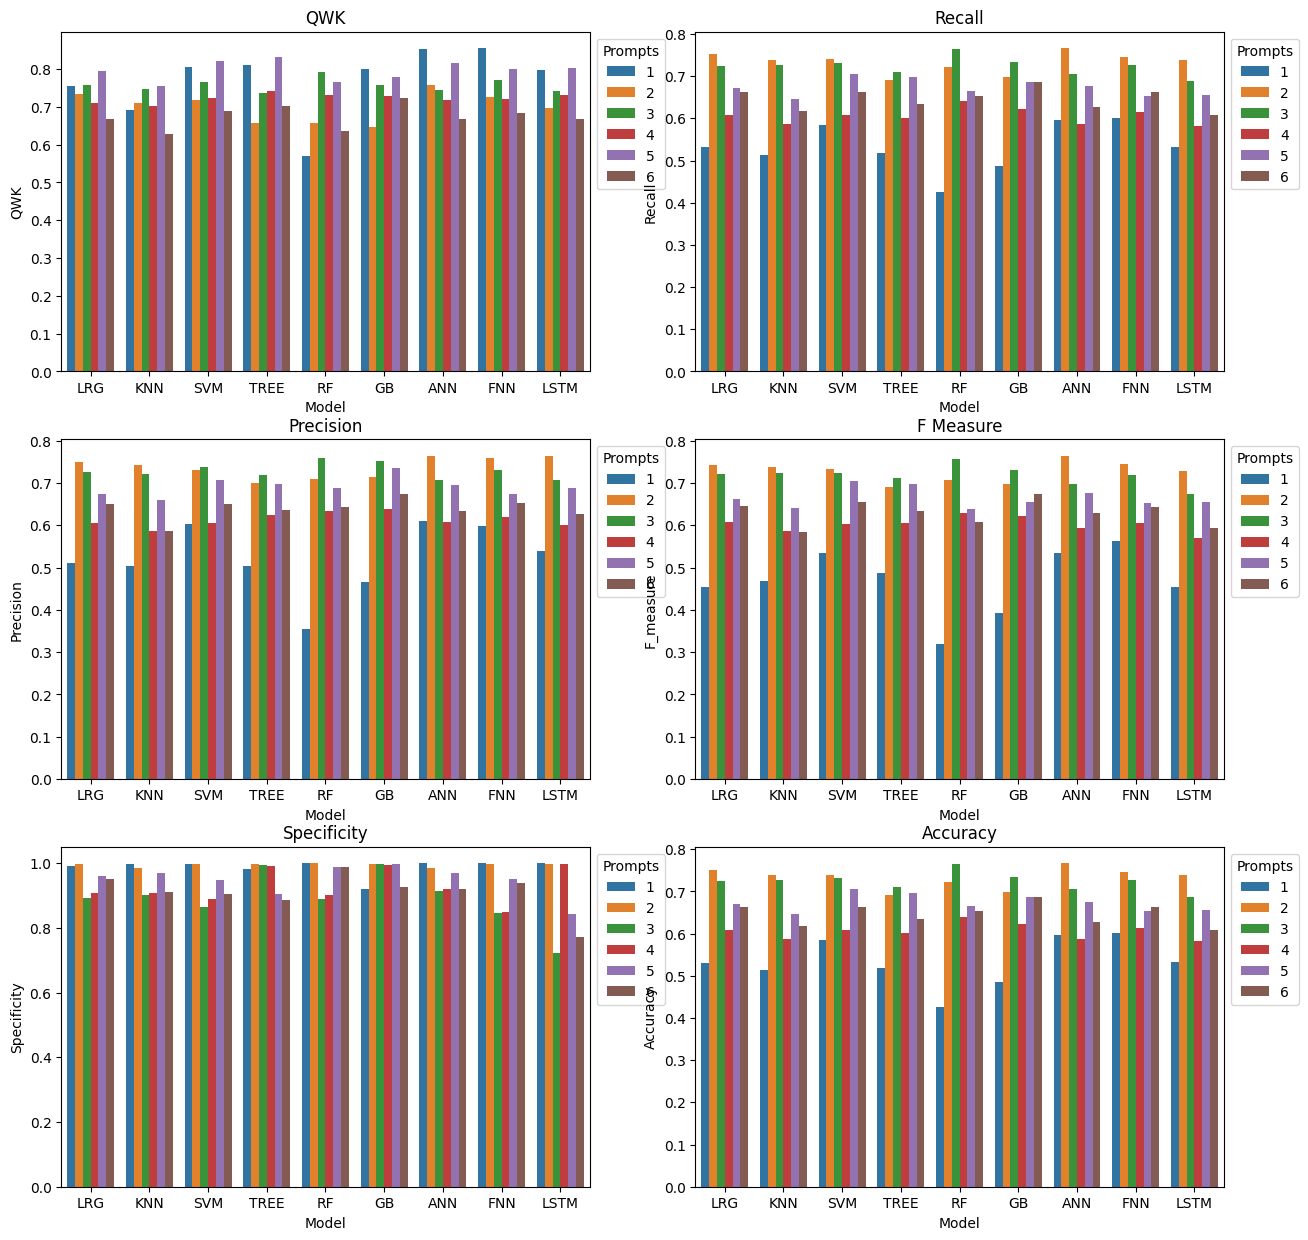

In [29]:
import altair as alt
import seaborn as sns
#figsize=(15,15)
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.barplot(x='Model', y='QWK', hue='Prompts', data=df,ax=ax[0, 0])
ax[0, 0].set_title('QWK')
sns.barplot(x='Model', y='Recall', hue='Prompts', data=df,ax=ax[0, 1])
ax[0, 1].set_title('Recall')
sns.barplot(x='Model', y='Precision', hue='Prompts', data=df,ax=ax[1, 0])
ax[1, 0].set_title('Precision')
sns.barplot(x='Model', y='F_measure', hue='Prompts', data=df,ax=ax[1, 1])
ax[1, 1].set_title('F Measure')
sns.barplot(x='Model', y='Specificity', hue='Prompts', data=df,ax=ax[2, 0])
ax[2, 0].set_title('Specificity')
sns.barplot(x='Model', y='Accuracy', hue='Prompts', data=df,ax=ax[2, 1])
ax[2, 1].set_title('Accuracy')
#sns.move_legend(ax, "center right")
sns.move_legend(ax[0,0], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[0,1], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[1,0], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[1,1], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[2,0], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[2,1], "upper left", bbox_to_anchor=(1, 1))
#fig.suptitle('For all models for Prompt 2-6')
#handles, labels = ax[0, 0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower center', ncol=4)

plt.show()

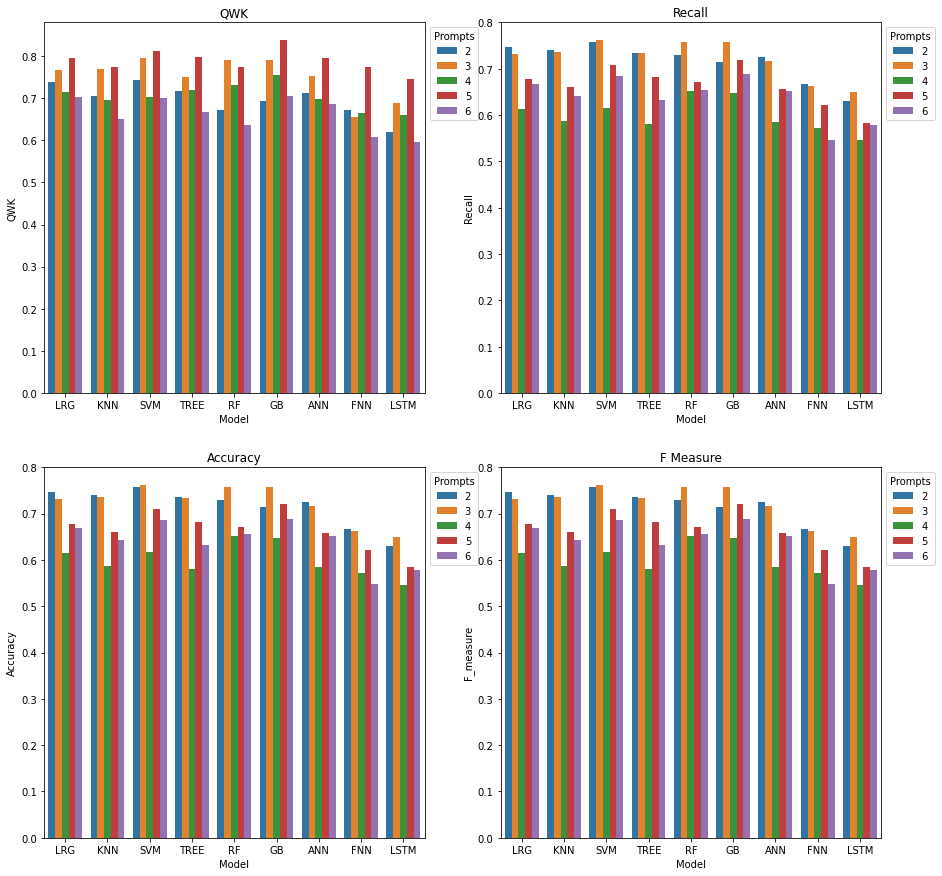

In [ ]:
import altair as alt
import seaborn as sns
#figsize=(15,15)
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
sns.barplot(x='Model', y='QWK', hue='Prompts', data=df,ax=ax[0, 0])
ax[0, 0].set_title('QWK')
sns.barplot(x='Model', y='Recall', hue='Prompts', data=df,ax=ax[0, 1])
ax[0, 1].set_title('Recall')
sns.barplot(x='Model', y='Precision', hue='Prompts', data=df,ax=ax[1, 0])
ax[1, 0].set_title('Precision')
sns.barplot(x='Model', y='F_measure', hue='Prompts', data=df,ax=ax[1, 1])
ax[1, 1].set_title('F Measure')
#sns.move_legend(ax, "center right")
sns.move_legend(ax[0,0], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[0,1], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[1,0], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[1,1], "upper left", bbox_to_anchor=(1, 1))
#fig.suptitle('For all models for Prompt 2-6')
#handles, labels = ax[0, 0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower center', ncol=4)

plt.show()

In [ ]:
n_classes = 3  # specify the number of classes
y_true_bin = label_binarize(dat[label], classes=range(n_classes))  # shape (n_samples, n_classes)

aucs = []
for i in range(n_classes):
    y_true_i = y_true_bin[:, i]
    y_pred_probs_i = y_pred_probs[:, i]
    auc_i = roc_auc_score(y_true_i, y_pred_probs_i)
    aucs.append(auc_i)

multiclass_auc = sum(aucs) / n_classes


In [ ]:
mdel="GB"
#filein="/content/gdrive/My Drive/AutomaticScoring/outBERT1/validation_score_"+mdel+"Grid_predicted.csv"
filein="/content/gdrive/My Drive/AutomaticScoring/outBERT/validation_score_"+mdel+"_predicted.csv"
df= pd.read_csv(filein)

validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
tempQWK=[]
for i in range(0,6):
  filter=df['essay_set_x']==i+1
  df1=df[filter]
  validation_QWK_1=sklearn_qwk(np.asarray(df1['domain1_score'], dtype=int),np.asarray(df1['Predicted_score'], dtype=int))
  tempQWK.append(validation_QWK_1)

ANN=pd.DataFrame(tempQWK)
sum(tempQWK)/6

0.7341506745092089

In [ ]:

mdel="ANN"
filein="/content/gdrive/My Drive/AutomaticScoring/out1/validation_score_"+mdel+"_predicted.csv"

df= pd.read_csv(filein)
i=0
prompt=i+1
pt1_dat=df[df.essay_set==prompt]
labels = list(range(1,12))

cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int),labels=labels)
print(cm)


[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   5   0   0   0   0   0]
 [  0   0   0   0   0  24   1   2   0   0   0]
 [  0   0   0   0   0  16   1  43   0   0   0]
 [  0   0   0   0   0   2   0 185   5   3   0]
 [  0   0   0   0   0   0   0  75  46  36   0]
 [  0   0   0   0   0   0   0   2  15  87   1]
 [  0   0   0   0   0   0   0   0   2  29   0]]


In [ ]:

mdel="ANN"

i=5
prompt=i+1
filein="/content/gdrive/My Drive/AutomaticScoring/out4/validation_score_"+mdel+"Prompt"+str(prompt)+"_predicted.csv"
df= pd.read_csv(filein)
pt1_dat=df[df.essay_set==prompt]

cm = pd.crosstab(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
print(cm)
fileout="/content/gdrive/My Drive/AutomaticScoring/out4/"+mdel+"P"+str(prompt)+"Table.csv"

pd.DataFrame(cm).to_csv(fileout)

col_0  0   1   2    3   4
row_0                    
0      2   1   1    0   0
1      3  21  15    3   0
2      0  23  66   49   3
3      0   1  48  230  48
4      0   0   5   27  54


In [ ]:

mdel="ANN"
#filein="/content/gdrive/My Drive/AutomaticScoring/out1/validation_score_"+mdel+"_predicted.csv"
filein="/content/gdrive/My Drive/AutomaticScoring/out1/train_score_"+mdel+"_predicted.csv"

df= pd.read_csv(filein)
i=0
prompt=i+1
pt1_dat=df[df.essay_set==prompt]
labels = list(range(1,6))

cm = pd.crosstab(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
print(cm)
fileout="/content/gdrive/My Drive/AutomaticScoring/out1/T"+mdel+"P"+str(prompt)+"Table.csv"

pd.DataFrame(cm).to_csv(fileout)

col_0  2   6   7    8   9    10  11  12
row_0                                  
2      10   0   0    0   0    0   0   0
3       1   0   0    0   0    0   0   0
4       2  15   0    0   0    0   0   0
5       1  15   0    1   0    0   0   0
6       1  75   0   34   0    0   0   0
7       0  23   6  106   0    0   0   0
8       0  11   0  600  48   28   0   0
9       0   0   0  169  88   77   0   0
10      0   0   0   48  55  210   3   0
11      0   0   0    4   5   96   4   0
12      0   0   0    0   0   41   5   1


In [ ]:
mdel="ANN"
filein="/content/gdrive/My Drive/AutomaticScoring/out/validation_score_"+mdel+"_predicted.csv"
filein="/content/gdrive/My Drive/AutomaticScoring/outBERT1/validation_score_"+mdel+"_predicted.csv"

df= pd.read_csv(filein)

validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
tempQWK=[]
for i in range(0,6):
  filter=df['essay_set_x']==i+1
  df1=df[filter]
  validation_QWK_1=sklearn_qwk(np.asarray(df1['domain1_score'], dtype=int),np.asarray(df1['Predicted_Domain1_score'], dtype=int))
  tempQWK.append(validation_QWK_1)

ANN=pd.DataFrame(tempQWK)
#sum(tempQWK)/6

mdel="RF"
filein="/content/gdrive/My Drive/AutomaticScoring/outBERT1/validation_score_"+mdel+"_predicted.csv"

df= pd.read_csv(filein)

validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
tempQWK=[]
for i in range(0,6):
  filter=df['essay_set_x']==i+1
  df1=df[filter]
  validation_QWK_1=sklearn_qwk(np.asarray(df1['domain1_score'], dtype=int),np.asarray(df1['Predicted_score'], dtype=int))
  tempQWK.append(validation_QWK_1)

RF=pd.DataFrame(tempQWK)

mdel="Tree"
filein="/content/gdrive/My Drive/AutomaticScoring/out/validation_score_"+mdel+"_predicted.csv"

df= pd.read_csv(filein)

validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
tempQWK=[]
for i in range(0,6):
  filter=df['essay_set_x']==i+1
  df1=df[filter]
  validation_QWK_1=sklearn_qwk(np.asarray(df1['domain1_score'], dtype=int),np.asarray(df1['Predicted_score'], dtype=int))
  tempQWK.append(validation_QWK_1)

Tree=pd.DataFrame(tempQWK)


mdel="GB"
filein="/content/gdrive/My Drive/AutomaticScoring/out/validation_score_"+mdel+"_predicted.csv"

df= pd.read_csv(filein)

validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
tempQWK=[]
for i in range(0,6):
  filter=df['essay_set_x']==i+1
  df1=df[filter]
  validation_QWK_1=sklearn_qwk(np.asarray(df1['domain1_score'], dtype=int),np.asarray(df1['Predicted_score'], dtype=int))
  tempQWK.append(validation_QWK_1)

GB=pd.DataFrame(tempQWK)
df=ANN.reset_index(drop=True).merge(RF.reset_index(drop=True), left_index=True, right_index=True)

df=df.reset_index(drop=True).merge(Tree.reset_index(drop=True), left_index=True, right_index=True)

df=df.reset_index(drop=True).merge(GB.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/out/QWK.csv"
pd.DataFrame(df).to_csv(fileout)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [ ]:
mdel="ANN"
filein="/content/gdrive/My Drive/AutomaticScoring/out1/validation_score_"+mdel+"_predicted.csv"

df= pd.read_csv(filein)

validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_Domain1_score'], dtype=int))
filter=df['essay_set_x']==1
df1=df[filter]
validation_QWK_1=sklearn_qwk(np.asarray(df1['domain1_score'], dtype=int),np.asarray(df1['Predicted_Domain1_score'], dtype=int))


df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/out/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/out/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()


##BERT

In [ ]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer as SBERT
from sklearn.metrics.pairwise import cosine_similarity
mSBERT = SBERT('xlm-r-100langs-bert-base-nli-stsb-mean-tokens')

### prepare BERT data

In [ ]:
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

dfBERT_train=pd.DataFrame(mSBERT.encode(train_txt['essay'].tolist()), index=train_txt['essay_id'])
dfBERT_validation=pd.DataFrame(mSBERT.encode(validation_txt['essay'].tolist()), index=validation_txt['essay'])
dfBERT_test=pd.DataFrame(mSBERT.encode(test_txt['essay'].tolist()), index=test_txt['essay'])


In [ ]:
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']
tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
df2=pd.DataFrame(train_txt[colname].values)
df1=pd.DataFrame(dfBERT_train)
tX_=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)

df2=pd.DataFrame(validation_txt[colname].values)
df1=pd.DataFrame(dfBERT_validation)
vX_=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
   
df2=pd.DataFrame(test_txt[colname].values)
df1=pd.DataFrame(dfBERT_test)
tsX_=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)

tX_numpy=tX_.to_numpy()
tY_numpy=np.array(tY)
tsX_numpy=tsX_.to_numpy()
vX_numpy=vX_.to_numpy()
vY_numpy=np.array(vY)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


####RF,all methods for BERT

In [ ]:
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat

#tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="RF"

n_estimators = range(10, 500,100)
parameters = { 'n_estimators':[10, 20, 30, 50,70, 100, 200, 300, 400, 500]}
RF = RandomForestClassifier()
grid = GridSearchCV(RF, parameters)
grid.fit(tX_numpy, tY)


test_predicted =grid.predict(tsX_numpy)
train_predicted=grid.predict(tX_numpy)
validation_predicted=grid.predict(vX_numpy)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

LGRRate_validation_score=grid.score(vX_numpy,vY)
LGRRate_train_score=grid.score(tX_numpy,tY)
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

In [ ]:
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat

#tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mlp_clf = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40)],
    'max_iter': [500, 800],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.3, 1],
    'learning_rate': ['adaptive'],
}
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)

grid.fit(tX_numpy, tY)
  
mdel="ANNGrid"

test_predicted =grid.predict(tsX_numpy)
train_predicted=grid.predict(tX_numpy)
validation_predicted=grid.predict(vX_numpy)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

LGRRate_validation_score=grid.score(vX_numpy,vY)
LGRRate_train_score=grid.score(tX_numpy,tY)
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
encoder = LabelEncoder()
encoder.fit(tY)
encoded_Y = encoder.transform(tY)
encoded_vY = encoder.transform(vY)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_vy = np_utils.to_categorical(encoded_vY)

output_shape=dummy_y.shape[1]
input_shape=tX_numpy.shape[1]
mdel='FNN'
def create_baseline():
  model_ffn = Sequential()
  model_ffn.add(Dense(1000, activation='relu',input_dim=input_shape)) #250
  model_ffn.add(Dense(500, activation='relu'))
  model_ffn.add(Dense(500, activation='relu'))
  model_ffn.add(Dense(500, activation='relu'))
  model_ffn.add(Dense(500, activation='relu'))
  #model_ffn.add(Dense(output_shape, activation='softmax'))
  model_ffn.add(Dense(output_shape, activation='sigmoid'))
  #model_ffn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
  model_ffn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model_ffn
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
#results = cross_val_score(estimator, tX, dummy_y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
param_grid={'epochs': [64,32],'batch_size': [5, 12, 32], 'verbose': [0]}
grid = GridSearchCV(estimator, param_grid,cv=5)
grid.fit(tX_numpy, dummy_y)

train_scores_ffn=grid.score(tX_numpy, dummy_y)
validation_scores_ffn=grid.score(vX_numpy, dummy_vy)

train_predicted = pd.DataFrame(grid.predict(tX_numpy))
validation_predicted = pd.DataFrame(grid.predict(vX_numpy))
test_predicted = pd.DataFrame(grid.predict(tsX_numpy))
#train_predicted_=train_predicted.idxmax(axis=1, skipna=True)
#validation_predicted_=validation_predicted.idxmax(axis=1, skipna=True)
#test_predicted_=test_predicted.idxmax(axis=1, skipna=True)

#df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df2=train_predicted
df2.columns=['Predicted_score']
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

#df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df2=validation_predicted
df2.columns=['Predicted_score']
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

LGRRate_validation_score=grid.score(vX_numpy,dummy_vy)
LGRRate_train_score=grid.score(tX_numpy,dummy_y)
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)


In [ ]:
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
#mdel="SVC"
#parameters = {'kernel':['rbf'], 'C':[0.5, 1, 10,20,  30, 50, 100,200]}
#svc = svm.SVC()
#grid = GridSearchCV(svc, parameters)
mdel="LRG"
parameters = { 'C':[0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5]}
LRG = LogisticRegression()
grid = GridSearchCV(LRG, parameters)
grid.fit(tX_numpy, tY)

test_predicted =grid.predict(tsX_numpy)
train_predicted=grid.predict(tX_numpy)
validation_predicted=grid.predict(vX_numpy)

df2=pd.DataFrame(train_predicted,columns=['Predicted_score'])
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted),columns=['Predicted_score'])
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX_numpy,list(vY))
LGRRate_train_score=grid.score(tX_numpy,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

In [ ]:


train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="KNN"
parameters = { 'n_neighbors':[1,3,5,7 ,9,10, 12,13,15,20,25]}
KNN = KNeighborsClassifier()
grid = GridSearchCV(KNN, parameters)
grid.fit(tX_numpy, tY)

test_predicted =grid.predict(tsX_numpy)
train_predicted=grid.predict(tX_numpy)
validation_predicted=grid.predict(vX_numpy)

df2=pd.DataFrame(train_predicted)

df2.columns=['Predicted_score']
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(validation_predicted)
df2.columns=['Predicted_score']
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX_numpy,list(vY))
LGRRate_train_score=grid.score(tX_numpy,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:

train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="GB"
parameters = { 'n_estimators':[ 10, 30, 50]}
GB = GradientBoostingClassifier()
grid = GridSearchCV(GB, parameters)
grid.fit(tX_numpy, tY)

test_predicted =grid.predict(tsX_numpy)
train_predicted=grid.predict(tX_numpy)
validation_predicted=grid.predict(vX_numpy)

df2=pd.DataFrame(train_predicted)

df2.columns=['Predicted_score']
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(validation_predicted)
df2.columns=['Predicted_score']
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX_numpy,list(vY))
LGRRate_train_score=grid.score(tX_numpy,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="Tree"
parameters = { 'max_depth':[3,9,12,16,20,25,30]}
Tree = DecisionTreeClassifier()
grid = GridSearchCV(Tree, parameters)
grid.fit(tX_numpy, tY)

test_predicted =grid.predict(tsX_numpy)
train_predicted=grid.predict(tX_numpy)
validation_predicted=grid.predict(vX_numpy)

df2=pd.DataFrame(train_predicted)
df2.columns=['Predicted_score']
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted))
df2.columns=['Predicted_score']
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted))
df2.columns=['Predicted_score']
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX_numpy,list(vY))
LGRRate_train_score=grid.score(tX_numpy,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


###BERT second way

In [ ]:
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

dfBERT_train_=pd.DataFrame(mSBERT.encode(train_essay_dat), index=train_txt['essay_id'])
dfBERT_validation_=pd.DataFrame(mSBERT.encode(validation_essay_dat), index=validation_txt['essay'])
dfBERT_test_=pd.DataFrame(mSBERT.encode(test_essay_dat), index=test_txt['essay'])

In [ ]:
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']
tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
df2=pd.DataFrame(train_txt[colname].values)
df1=pd.DataFrame(dfBERT_train_)
tX__=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)

df2=pd.DataFrame(validation_txt[colname].values)
df1=pd.DataFrame(dfBERT_validation_)
vX__=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
   
df2=pd.DataFrame(test_txt[colname].values)
df1=pd.DataFrame(dfBERT_test_)
tsX__=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)

tX_numpy_=tX__.to_numpy()
tY_numpy=np.array(tY)
tsX_numpy_=tsX__.to_numpy()
vX_numpy_=vX__.to_numpy()
vY_numpy=np.array(vY)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat

#tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mlp_clf = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40)],
    'max_iter': [500, 800],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.3, 1],
    'learning_rate': ['adaptive'],
}
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)

grid.fit(tX_numpy_, tY)
  
mdel="ANNGrid"

test_predicted =grid.predict(tsX_numpy_)
train_predicted=grid.predict(tX_numpy_)
validation_predicted=grid.predict(vX_numpy_)

df2=pd.DataFrame(train_predicted)
df2.columns=['Predicted_score']
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT1/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT1/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted))
df2.columns=['Predicted_score']
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT1/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT1/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted))
df2.columns=['Predicted_score']
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT1/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

LGRRate_validation_score=grid.score(vX_numpy_,vY)
LGRRate_train_score=grid.score(tX_numpy_,tY)
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT1/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']

tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="GB"
parameters = { 'n_estimators':[ 10,  30, 50]}
GB = GradientBoostingClassifier()
grid = GridSearchCV(GB, parameters)
grid.fit(tX_numpy_, tY)

test_predicted =grid.predict(tsX_numpy_)
train_predicted=grid.predict(tX_numpy_)
validation_predicted=grid.predict(vX_numpy_)

df2=pd.DataFrame(train_predicted)

df2.columns=['Predicted_score']
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT1/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT1/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(validation_predicted)
df2.columns=['Predicted_score']
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT1/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT1/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted),columns=['Predicted_score'])
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT1/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
LGRRate_validation_score=grid.score(vX_numpy_,list(vY))
LGRRate_train_score=grid.score(tX_numpy_,list(tY))
result=np.array([LGRRate_train_score, LGRRate_validation_score,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/outBERT1/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
mdel="GB"
filein="/content/gdrive/My Drive/AutomaticScoring/outBERT/validation_score_"+mdel+"_predicted.csv"
filein="/content/gdrive/My Drive/AutomaticScoring/outBERT/train_score_"+mdel+"_predicted.csv"
df=pd.read_csv(filein)
df.columns
df[['domain1_score','Predicted_score']].corr()

,domain1_score,Predicted_score
domain1_score,1.00000,0.97758
Predicted_score,0.97758,1.00000


### 11/8/22 This RNN works
https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

https://www.featureform.com/post/the-definitive-guide-to-embeddings
THis article about embedding, BERT is a embedding

In [ ]:
train_txt=train_score_dat
validation_txt=validation_score_dat
test_txt=test_score_dat
colname=['essay_set', 'FleschScore', 'smog_index', 'difficult_words','avg_sentence_length', 'spache_readability','automated_readability_index','total_words','avg_sentence_length']
tX, tY,vX, vY,tsX=PreModel(train_txt,validation_txt,test_txt,train_essay_dat, validation_essay_dat,test_essay_dat, colname, STOPWORDS,TF_IDF=True, Label="domain1_score")
mdel="RNN"
encoder = LabelEncoder()
encoder.fit(tY)
encoded_Y = encoder.transform(tY)
encoded_vY = encoder.transform(vY)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_vy = np_utils.to_categorical(encoded_vY)

output_shape=dummy_y.shape[1]

tX=pd.DataFrame(tX)
vX=pd.DataFrame(vX)
tsX=pd.DataFrame(tsX)
output_shape=dummy_y.shape[1]
MAX_NUM_WORDS=1000
EMBEDDING_DIM=dummy_y.shape[1]
max_review_length=tX.shape[1]
timesteps=tX.shape[0]

output_shape=dummy_y.shape[1]
time_steps=1
tX_=tX.to_numpy()
vX_=vX.to_numpy()
tsX_=tsX.to_numpy()
tX__ = tX_.reshape(tX.shape[0] ,time_steps,tX.shape[1])
vX__ = vX_.reshape(vX.shape[0],time_steps,vX.shape[1])
tsX__ = tsX_.reshape(tsX.shape[0],time_steps,tsX.shape[1])

def create_baseline():
   rnnmodel = Sequential()  
   rnnmodel.add(Embedding(MAX_NUM_WORDS, dummy_y.shape[1] , input_length=max_review_length))
   rnnmodel.add(Flatten())
   #rnnmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
   rnnmodel.add(Dense(64, activation='relu'))
   rnnmodel.add(Dense(64, activation='relu'))
   rnnmodel.add(Dense(64, activation='relu'))
   rnnmodel.add(Dense(64, input_dim=output_shape,activation='relu'))
   rnnmodel.add(Dense(output_shape, activation='sigmoid'))
   rnnmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
   return rnnmodel

# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline)
param_grid={'epochs': [64,32,12],'batch_size': [32,12], 'verbose': [0]}
grid = GridSearchCV(estimator, param_grid,cv=5)
grid.fit(tX, dummy_y)


train_scores_ffn=grid.score(tX, dummy_y)
validation_scores_ffn=grid.score(vX, dummy_vy)

train_predicted = pd.DataFrame(grid.predict(tX))
validation_predicted = pd.DataFrame(grid.predict(vX))
test_predicted = pd.DataFrame(grid.predict(tsX))

#train_predicted_=train_predicted.idxmax(axis=1, skipna=True)
#validation_predicted_=validation_predicted.idxmax(axis=1, skipna=True)
#test_predicted_=test_predicted.idxmax(axis=1, skipna=True)

df2=pd.DataFrame(train_predicted)
df2.columns=['Predicted_score']
df1=train_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
#train_QWK=sklearn_qwk(df['score'], df['Predicted_score'])
train_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))
fileout="/content/gdrive/My Drive/AutomaticScoring/out/train_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)

for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/out/TrainDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(validation_predicted))
df2.columns=['Predicted_score']
df1=validation_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/out/validation_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)
validation_QWK=sklearn_qwk(np.asarray(df['domain1_score'], dtype=int),np.asarray(df['Predicted_score'], dtype=int))


for i in range(0,6):
  prompt=i+1
  pt1_dat=df[df.essay_set==prompt]
  cm = confusion_matrix(np.asarray(pt1_dat['domain1_score'], dtype=int),np.asarray(pt1_dat['Predicted_score'], dtype=int))
  accuracyscore= round(100*np.trace(cm)/pt1_dat.shape[0]) 
  plt.figure(figsize=(6,6))
  sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Score')
  plt.xlabel('Predicted Score')
  all_sample_title = ' Prompt '+ str(prompt)+' '+ str(mdel)+' Accuracy Score: {0}'.format(accuracyscore)
  plt.title(all_sample_title, size = 15)
  name=str(mdel)+'_'+str(prompt)+'_Copnfusion.jpg'
  fileout="/content/gdrive/My Drive/AutomaticScoring/out/ValidationDat_"+mdel+'_'+str(prompt)+'_Copnfusion.jpg'
  plt.savefig(fileout)
  plt.close()

df2=pd.DataFrame(np.rint(test_predicted))
df2.columns=['Predicted_score']
df1=test_score_dat
df=df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)
fileout="/content/gdrive/My Drive/AutomaticScoring/out/test_score_"+mdel+"_predicted.csv"
pd.DataFrame(df).to_csv(fileout)


result=np.array([train_scores_ffn, validation_scores_ffn,train_QWK,validation_QWK]) #0.99,0.49
result=pd.DataFrame(result)
result=result.transpose()
result.columns =['train_score','validation_score','train_QWK','validation_QWK']
fileout="/content/gdrive/My Drive/AutomaticScoring/out/"+mdel+"_result.csv"
pd.DataFrame(result).to_csv(fileout)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


111/111 [==============================] - 0s 2ms/step
